In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
GOOGLE_DRIVE_BASE_PATH = "/content/drive/MyDrive/"
user = "Matthew" # change before running the notebook

if user == "Julia":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "ER131-Project/" + "data/"
elif user == "Matthew":
    # DATA_PATH = "/Users/mdong/dataScience/projects-ml/ca-waste/" + "data/"
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "Sustainability/ER131-Project/" + "data/"
elif user == "Samadi":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "ER131-Project/" + "data/"
elif user == "Shaye":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "ER131-Project/" + "data/"
    
print("User: {}\nPath to data: {}".format(user, DATA_PATH))

User: Matthew
Path to data: /content/drive/MyDrive/Sustainability/ER131-Project/data/


#**Waste Predictions for California Counties**

##Fall 2020

Matthew Dong: located data, cleaned data, coded regression analysis, helped on videos and final deliverables.

Shaye Hong: located data, coded regression analysis, wrote Input Data Description, helped on videos & final deliverables.

Samadi Karunasundera: located data, performed EDA, helped on videos & final deliverables. 

Julia Sherman: coded regression analysis, wrote Project Background and Conclusions, helped on videos and final deliverables.

---
#**1.2 Abstract**

As the total population in the United States continues to grow, waste generation increases and has increasingly devastating impacts on the environment and people, especially communities of color and lower socioeconomic status. This project aims to predict waste generation in California Counties over the course of a year, based on county level demographic data. The data is compiled from government certified sources such as the California Energy Commission, CalRecycle, and the US Census Bureau between 2000-2019. Understanding trends in county-wide waste production can help inform local governance on how to allocate resources for expansion of waste disposal facilities and infrastructure, and create future plans to reduce waste.

In Part 1 of the analysis, total waste generated by California counties over a year is predicted based on model selection training on the entire California dataset. Random Forests was the best model for these predictions. In Part 2, total waste generated by Alameda and Tulare counties, are predicted based on model selection training on individual county data. Lasso was the best model for these predictions. In Part 3, waste generation for a specific county is forecasted for the year 2020. Ridge was the best model for these predictions.

These questions analyze the trade-offs between scope and granularity on the predictive power of OLS, Ridge, Lasso, Elastic Net, and Random Forest Decision Trees. In comparing the performance of these model types, we have seen that different regression model types work better on full datasets vs. subsets of the data.


---
#**1.3 Project Background**

Waste is one of the largest environmental problems humankind faces today. In the past 50 years, a dramatic increase in consumerist culture and access to a wide variety of products packaged for convenience has drastically increased the amount of waste generated around the world. With increased waste comes increased concerns about its pervasiveness in the environment, damage to ecosystems and communities due to pollution, habitat fragmentation and loss to construct waste management facilities and extract virgin materials needed for production, and disproportionate exposure to toxins in communities of color and lower socioeconomic status, to name a few. Often, waste is viewed from one singular lens: pollution in waterways, killing sea turtles, or taking up too much space in landfills. In actuality, waste is an incredibly intersectional aspect of the climate crisis that affects every single person on the planet, whether they realize it or not. That being said, people least responsible for overconsumption or increased greenhouse gas emissions almost always bear the brunt of these harmful behaviors. Waste produced in the United States has massive impacts on communities in 3rd world countries (especially Eastern Asian countries) and its indirect impacts on climate change as a whole will ultimately impact poorer countries and people of color most significantly. 

Evaluating the effectiveness of recycling and composting systems across the globe is an important step in addressing the harmfulness of waste generation on humanity. However, waste reduction is arguably the single most important and impactful avenue for positive change. How do we hold large aggregates of people accountable to reducing their waste? Individual action, better education, and pressure on large corporations and institutions are a good start. Beyond this, state and federal governments need to be collecting detailed data about the waste they produce and set more aggressive targets for waste reduction. 

According to the EPA Municipal Solid Waste Report in 2017, Americans produced almost 268 million tons of solid waste, which equates to about 4.5 pounds per person, per day. The EPA estimates that the U.S. has capacity to compost less than 3 million tons of food waste annually, which is 6.3% of total food waste produced. Clearly the infrastructure is not where it needs to be.

How will this waste generation change in the future? Now more than ever, it is incredibly important for federal, state, and local governments to have in-depth understandings of the makeup of their waste streams and how waste generation will change. Access to this information allows for better allocation of waste management resources including: space for facilities, increased needs for composting and recycling infrastructure, jobs necessary to keep facilities running, transport vehicles needed for hauling waste, and educational programs to inform residents on how to properly sort their waste. 

This project aims to analyze the effectiveness of different regression model types to predict the amount of waste generated in a given California county over the course of a year. Comparisons will be made between models trained on the full dataset of all counties in California and models trained on data from two individual counties: Alameda and Tulare. We will also forecast waste generation in 2020 for Alameda county. These two counties have been selected for their differences in population density, climate, and economic inputs. Alameda is an urban county with high population density and urbanized economy. The climate is much wetter and cooler than that of Tulare. Tulare is a much more rural county with low population density and a greater reliance on agriculture and outdoor tourism for economic stimulus.

---
#**1.4 Project Objective**

The purpose of this project is to train and evaluate models to predict total annual solid waste production in tons across California counties using data from CalRecycle, CA Energy Commission, CA Association of counties, and the CA State Controller's Office. 

Knowing how much waste a county might produce in the next 1, 2, … n years can help inform local governance on how to allocate resources for expansion of waste disposal facilities and infrastructure, as well as future plans for source reduction. This information can help federal and state governments to identify municipalities that might benefit most from additional grant money or improved technology (especially communities of color and lower socioeconomic status).

---
#**1.5 Input Data Description**

##**CalRecycle** 
The following data sets come from California's Department of Resources Recycling and Recovery, or CalRecycle which manages the state’s recycling and waste management programs. CalRecycle uploads their data to the Disposal Reports System (DRS) which is available for the public to download in the form of an excel or csv file. Information is reported by permitted facility operators and compiled by county/regional agency disposal reporting coordinators. The data sets for reported solid waste facilities include: landfills, transfer stations, composting sites, in-vessel digestion sites, engineered municipal solid waste conversion facilities, transformation facilities, and closed disposal sites. CalRecycle staff enters this data into the DRS system which undergoes three stages of data validation to ensure it matches the tonnage submitted by each county. Finalized data is released yearly. In terms of faithfulness, there are no clear signs of data falsification as there are multiple rounds of data validation and only permitted facility operators can report and enter the data. The only concern would be inconsistencies or typos from hand entered data. We have checked for potential typos, redundancies, or coded values in our exploratory data analysis.

**Multi-Year County Wide Origin Summary**

This data set contains information on the solid waste produced, disposed, exported, and transformed in tons by a county in a calendar quarter. 

* Structure: csv file
* Granularity: each record of the data represents the reported waste generated in a calendar quarter for a county in California. Reported trash produced, disposed, and transformed is aggregated over all the active facilities in a county. Each report is for a calendar quarter, or 3 month time period. The quarters are as follows: 
     * Q1: January, February, and March 
     * Q2: April, May, and June
     * Q3: July, August, and September
     * Q4: October, November, and December 


* Scope: This data covers all counties in California and was collected from 1995 to 2019. Data only accounts for active solid waste facilities monitored by CalRecycle as described above. Other types of waste that do not make it to facilities (burned, littered, in the ocean) are not tracked. 
* Temporality: This data covers the years 1995 to 2019.
* Faithfulness: As mentioned above, there does not appear to be a reason that the data would be unfaithful aside from human errors from manually entering data. There are not any null or repeated values. Additionally, there do not appear to be any redundant classification or repeated filled null values. 

**Waste Characterization Per County**

This data set contains information on the estimated residential disposed waste composition by material type and stream for the specified California jurisdiction (county). The values are estimated from 2014 residential waste data in DMS. Single family tons and multifamily tons are aggregated to give total residential tons. Percents show the proportion each material contributes to each stream.

* Structure: csv
* Granularity: Each row represents a waste stream for a county in California. For example, row one represents the waste stream for cardboard in Contra Costa. There 68 are types of solid waste classified including various types of glass, plastics, and paper.
* Scope: This data report covers waste streams by material type at the county level. It includes the percentage of the waste stream from single and multi family homes. Data was collected in the year 2014.
* Temporality: Values are reported for the year 2014. 
* Faithfulness: As mentioned above, the data goes through a 3 step validation process which suggests the data is faithful. From a brief exploration of the data, there does not seem to be any redundant categories, null values, or suspicious outliers.

In [ ]:
#Waste Characterization per County
calrecycle_waste_characterization_per_county_df = pd.read_csv(DATA_PATH + "calrecycle_waste_characterization_per_county.csv")
calrecycle_waste_characterization_per_county_df.head()

,Material Category,Material Type,County,Single Family Tons,Regional Single Family Composition,Multi Family Tons,Statewide Multi Family Composition,Total Residential Tons,Total Residential Composition
0,Paper,Uncoated Corrugated Cardboard,CONTRA COSTA,1536,0.006688,1931,0.035679,3467,0.012218
1,Paper,Paper Bags,CONTRA COSTA,719,0.003132,286,0.005275,1005,0.003541
2,Paper,Newspaper,CONTRA COSTA,1665,0.007250,2513,0.046431,4178,0.014724
3,Paper,White Ledger Paper,CONTRA COSTA,426,0.001854,286,0.005287,712,0.002509
4,Paper,Other Office Paper,CONTRA COSTA,1097,0.004775,319,0.005888,1415,0.004987


##**California Energy Commission**

The California Energy Comission has created an on-line database for informal reporting purposes, using numerous electricity and natural gas consumption data sources. Users can generate reports showing the amount of energy consumed by geographical area, sector (residential, commercial, industrial) classifications. The database provides easy downloading of energy consumption data into Microsoft Excel (XLSX) and comma-separated values (CSV) file formats. 

**Energy Consumption Database**

* Structure: csv or excel file
* Granularity: Each entry represents energy usage of a California county for a given year. Additionally, data is presented as residential, non residential, and total usage for each county. 
* Scope: data is presented as residential, non residential, and total usage for each county.  Energy consumption data was collected from investor owned utilities, joint utility owned agencies, publicly owned agencies, rural electric cooperatives, self generators, and western area power agency entities across california and was aggregated by county. Total usage is the sum of the residential and non residential usage. Non-residential usage consumption includes the following sectors: agricultural and water pumps, commercial building, commercial other, industry, mining, and construction.
* Temporality: The data was collected over 1990-2019.
* Faithfulness: This data is open to the public and can be downloaded as excel or csv files. The data was reviewed by the California Energy Commission, so the quality should be faithful. One possible concern would be null values where we assume data was not collected or invalidated for reasons that were not reported. 


In [ ]:
#Energy Consumption per County
cec_electricity_by_county_full_df = pd.read_csv(DATA_PATH + "cec-electricity-by-county-full.csv")
cec_electricity_by_county_full_df.head()

,County,Sector,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,Total Usage
0,ALAMEDA,Non-Residential,7619.304491,7445.556909,8087.656147,7873.882100,7341.708151,7408.645462,7634.447579,7592.708714,7955.624590,7701.202729,7342.253998,8181.910616,8766.192606,8064.085329,8040.891948,7773.367939,7662.431120,7613.366379,7443.365995,7736.055471,7766.058995,7193.581963,7823.244481,7769.025061,7309.930938,6668.237122,7260.776432,6822.523242,6809.573768,7109.299895,227816.910170
1,ALAMEDA,Residential,3064.781376,2945.804917,2991.794416,2917.342741,2893.676837,2891.232325,2984.213677,2998.246885,3023.830340,3021.008265,3016.259087,2996.061668,2971.652195,3118.114844,3025.149538,2897.764371,2937.070283,2811.610305,2745.201964,2926.106226,2890.765488,2791.331196,2674.834394,2615.308775,2548.457958,2774.566317,2529.229286,2465.000074,2515.209970,2498.265626,85479.891344
2,ALAMEDA,Total,10684.085867,10391.361826,11079.450563,10791.224841,10235.384987,10299.877787,10618.661255,10590.955599,10979.454929,10722.210994,10358.513085,11177.972284,11737.844800,11182.200173,11066.041486,10671.132309,10599.501403,10424.976683,10188.567959,10662.161697,10656.824483,9984.913160,10498.078875,10384.333836,9858.388895,9442.803439,9790.005719,9287.523316,9324.783738,9607.565521,313296.801509
3,ALPINE,Non-Residential,8.774426,9.283298,9.025215,8.124741,4.354396,4.008389,4.752038,4.590161,5.199864,5.203784,5.234789,9.368614,10.685739,9.377073,9.132023,9.431229,5.112883,4.671739,5.081493,5.159971,4.617177,4.832369,4.468048,4.384382,4.296693,4.382027,4.485710,4.224083,3.906455,3.581764,179.750573
4,ALPINE,Residential,10.131788,9.420910,9.951697,9.290913,11.855504,11.974975,13.424431,9.298178,9.093424,12.451971,13.029405,8.899778,9.326645,9.537211,8.090874,8.996372,6.352394,6.720953,6.858448,6.247035,6.597345,6.792005,6.373298,6.063832,6.231561,6.183168,6.812776,5.808735,6.165242,6.036978,254.017846


##**U.S. Census Bureau**

The U.S. Census Burea has created a new platform (Data.census.gov) to allow the public easier access to demographic and economic data. The site makes data available in csv or excel files from one centralized place. All of this data is collected by the Census Bureau through a variety of collection techniques and processes.

**Total Population per County**

* Structure: csv or excel file
* Granularity: total population counts for every county in California for each year 2000-2019.
* Scope: the U.S. Census Bureau has provided population totals for cities and counties across the United States for many, many years. We used only the total population counts for counties in California.
* Temporality: Census data has been collected since the early 1900s, we used only data from 2000-2019. 
* Faithfulness: The data has been collected and reviewed by the Census Bureau, so it should be high quality. There are no null values present in the data we used.


**Geography Division - TIGER/Geographic Identification Code Scheme (GICS)** 

The Census Bureau developed the Topologically Integrated Geographic Encoding and Referencing (TIGER) System to automate the geographic support processes needed to meet the geographic needs of the 1990 census. Land area for each county in California is calculated from the specific set of boundaries recorded for each entity. Land area is updated every 10 years. 

We used the area of each California county to calculate population density (total population each year / total area of a given county) to use as a feature in our models. 

* Structure: csv or excel file
* Granularity: an area measurement providing the size, in square meters, of the land portions of California counties. Land area measurements are originally recorded as whole square meters, but we converted to square miles.
* Scope: This data set includes geographic boundaries for all entities in the United States. We used only the measurements of each individual county in California. 
* Temporality: The data in this dataset was collected once in 2010. County borders in California have not changed since then.
* Faithfulness: This data is open to the public and can be downloaded as excel or csv files. The data was collected and reviewed by the Census Bureau, so the quality should be faithful. There are no null values.


In [ ]:
#TIGER data
land_area_in_square_miles_2010_df = pd.read_csv(DATA_PATH + "Land area in square miles, 2010 - (Square Miles) - Sheet1.csv")
land_area_in_square_miles_2010_df.head()

,County,Value
0,Alameda,739.02
1,Alpine,738.33
2,Amador,594.58
3,Butte,"1,636.46"
4,Calaveras,"1,020.01"


---
#**1.6 Data Cleaning**

##Cleaning CalRecycle Waste Data

###Combine all individual county files into a single DataFrame

In [ ]:
def filter_waste_origin_df(df, county):
    """Drop quarterly values in the csv and only keep yearly values
    Input:
        - calrecycle df
        - county (string)
    
    Ouput:
        - df with year, county, disposal ton
    """
    columns_to_keep = ["Report Year", "Diposal Ton", "County"]
    df["County"] = county
    missing_data = df["Report Year"].isnull()
    df = df[~missing_data]
    return df[columns_to_keep]

In [ ]:
calrecycle_data_path = DATA_PATH + "calrecycle-waste-production-data/"
county_waste_production = []
for f in os.listdir(calrecycle_data_path):
    filename, ext = os.path.splitext(f)
    county = filename.split("_waste_production")[0]
    county = county.replace("_", " ")
    print("[INFO] filtering county file: ", os.path.join(calrecycle_data_path, f))
    try:
        df = pd.read_excel(os.path.join(calrecycle_data_path, f), skiprows=3, skipfooter=2)
        filtered_df = filter_waste_origin_df(df, county)
        county_waste_production.append(filtered_df)
    except Exception as e:
        print("[DEBUG] Skipping: ", county)

county_waste_production_df = pd.concat(county_waste_production)

[INFO] filtering county file:  /content/drive/MyDrive/Sustainability/ER131-Project/data/calrecycle-waste-production-data/Alameda_waste_production.xlsx
[INFO] filtering county file:  /content/drive/MyDrive/Sustainability/ER131-Project/data/calrecycle-waste-production-data/Alpine_waste_production.xlsx
[INFO] filtering county file:  /content/drive/MyDrive/Sustainability/ER131-Project/data/calrecycle-waste-production-data/Amador_waste_production.xlsx
[INFO] filtering county file:  /content/drive/MyDrive/Sustainability/ER131-Project/data/calrecycle-waste-production-data/Butte_waste_production.xlsx
[INFO] filtering county file:  /content/drive/MyDrive/Sustainability/ER131-Project/data/calrecycle-waste-production-data/Calaveras_waste_production.xlsx
[INFO] filtering county file:  /content/drive/MyDrive/Sustainability/ER131-Project/data/calrecycle-waste-production-data/Colusa_waste_production.xlsx
[INFO] filtering county file:  /content/drive/MyDrive/Sustainability/ER131-Project/data/calrecycl

In [ ]:
county_waste_production_df.rename(columns={"Report Year": "Year", 
                                           "Diposal Ton": "Waste Produced (Tons)"}, inplace=True)
county_waste_production_df.head()

,Year,Waste Produced (Tons),County
0,1995.0,1583135.05,Alameda
65,1996.0,1510874.25,Alameda
130,1997.0,1593570.29,Alameda
195,1998.0,1671466.25,Alameda
260,1999.0,1733182.35,Alameda


###Remove null values

* drop null values from the data because we can't fit a model without a target variable

In [ ]:
num_null_values = county_waste_production_df.shape[0] - county_waste_production_df.dropna().shape[0]
print("number of null values: ", num_null_values)

number of null values:  13


In [ ]:
no_waste_data = county_waste_production_df[county_waste_production_df.isnull().any(axis=1)]
no_waste_data

,Year,Waste Produced (Tons),County
117,2008.0,NaN,Del Norte
13,1996.0,NaN,Modoc
39,1998.0,NaN,Modoc
52,1999.0,NaN,Modoc
78,2001.0,NaN,Modoc
91,2002.0,NaN,Modoc
104,2003.0,NaN,Modoc
130,2005.0,NaN,Modoc
143,2006.0,NaN,Modoc
156,2007.0,NaN,Modoc


In [ ]:
county_waste_production_df.dropna(inplace=True)

### Tests - sanity check that nothing went wrong during data cleaning

- Total number of counties (excluding Sutter) * total number of years = 58 - 1 * (2019 - 1995 + 1) - dropped null values = total number of observations in the final df
- Alameda County 2019 total waste produced = 1,465,264	
- LA County 2012 total waste produced = 8,141,712
- Orange County 2005 total waste produced = 4,290,785

In [ ]:
def get_feature(df, county, year, feature):
    """Testing function that gets a specific feature value from the dataframe from a specific year and county
    """
    county_condition = df["County"] == county
    year_condition = df["Year"] == year
    return df.loc[county_condition & year_condition, feature]

assert ~county_waste_production_df.isnull().values.any()
# assert all(~county_waste_production_df.isnull()) this comparison does not work
assert (58 - 1) * (2019 - 1995 + 1) - num_null_values == county_waste_production_df.shape[0]
assert np.isclose(1465264, get_feature(county_waste_production_df, "Alameda", 2019, "Waste Produced (Tons)"))
assert np.isclose(8141712, get_feature(county_waste_production_df, "Los Angeles", 2012, "Waste Produced (Tons)"))
assert np.isclose(4290785, get_feature(county_waste_production_df, "Orange", 2005, "Waste Produced (Tons)"))


## Cleaning Census Population Data

###2010-2019

In [ ]:
county_population_2010_2019 = pd.read_excel(DATA_PATH + "ca-finance-dpt-county-populations-2010-2019.xlsx", 
                                            sheet_name="Table 1 County State", header=1, skipfooter=1)
county_population_2010_2019.rename(columns={"COUNTY":"County"}, inplace=True)
county_population_2010_2019["County"] = county_population_2010_2019.County.str.strip()
county_population_2010_2019.head()

,County,4/1/2010,1/1/2011,1/1/2012,1/1/2013,1/1/2014,1/1/2015,1/1/2016,1/1/2017,1/1/2018,1/1/2019,1/1/2020
0,Alameda,1510271,1526110,1545917,1569989,1590729,1613528,1632599,1646711,1655306,1664783,1670834
1,Alpine,1175,1169,1166,1164,1163,1162,1162,1161,1159,1149,1142
2,Amador,38091,37173,36777,36267,36029,36114,36055,36928,37563,37820,37676
3,Butte,220000,220620,221340,222374,222988,223940,224096,225643,226374,221521,210291
4,Calaveras,45578,45540,45496,45424,45358,45265,45244,45170,45155,45085,45023


In [ ]:
county_population_2010_2019.set_index("County", inplace=True)
col_names_date = county_population_2010_2019.columns 
col_names_year = [int(date[-4:]) for date in col_names_date]
county_population_2010_2019.columns = col_names_year
county_population_2010_2019.reset_index(inplace=True)
county_population_2010_2019.head()

,County,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alameda,1510271,1526110,1545917,1569989,1590729,1613528,1632599,1646711,1655306,1664783,1670834
1,Alpine,1175,1169,1166,1164,1163,1162,1162,1161,1159,1149,1142
2,Amador,38091,37173,36777,36267,36029,36114,36055,36928,37563,37820,37676
3,Butte,220000,220620,221340,222374,222988,223940,224096,225643,226374,221521,210291
4,Calaveras,45578,45540,45496,45424,45358,45265,45244,45170,45155,45085,45023


In [ ]:
county_population_2010_2019 = county_population_2010_2019.melt(id_vars="County", var_name='Year', value_name="Population")
county_population_2010_2019.head()

,County,Year,Population
0,Alameda,2010,1510271
1,Alpine,2010,1175
2,Amador,2010,38091
3,Butte,2010,220000
4,Calaveras,2010,45578


###2000-2009

In [ ]:
county_population_2000_2009 = pd.read_excel(DATA_PATH + "ca-finance-dpt-county-populations-2000-2009.xls", 
                                            sheet_name="Table 1 County State", 
                                            header=3, skipfooter=2)
county_population_2000_2009.rename(columns={"COUNTY":"County"}, inplace=True)
county_population_2000_2009["County"] = county_population_2000_2009.County.str.strip()
county_population_2000_2009.dropna(how='all', inplace=True)
county_population_2000_2009.head()

,County,2000-04-01 00:00:00,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2010-04-01 00:00:00
1,Alameda,1443939.0,1457185.0,1467063.0,1467892.0,1466407.0,1462736.0,1462371.0,1470622.0,1484085.0,1497799.0,1509240.0,1510271.0
2,Alpine,1208.0,1220.0,1242.0,1248.0,1257.0,1237.0,1232.0,1252.0,1228.0,1194.0,1178.0,1175.0
3,Amador,35100.0,35495.0,36159.0,36656.0,36961.0,37434.0,37843.0,38025.0,37975.0,37884.0,38011.0,38091.0
4,Butte,203171.0,204591.0,206942.0,209389.0,211419.0,212955.0,214690.0,216401.0,217801.0,218887.0,219967.0,220000.0
5,Calaveras,40554.0,41042.0,41773.0,42651.0,43554.0,44348.0,45044.0,45477.0,45670.0,45632.0,45602.0,45578.0


In [ ]:
county_population_2000_2009.set_index("County", inplace=True)
col_names_date = county_population_2000_2009.columns 
col_names_year = [date.year for date in col_names_date]
county_population_2000_2009.columns = col_names_year
county_population_2000_2009.reset_index(inplace=True)
county_population_2000_2009.drop(columns=[2010], inplace=True) # drop 2010 bc already included in 2010-2019
county_population_2000_2009.head()

,County,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alameda,1443939.0,1457185.0,1467063.0,1467892.0,1466407.0,1462736.0,1462371.0,1470622.0,1484085.0,1497799.0
1,Alpine,1208.0,1220.0,1242.0,1248.0,1257.0,1237.0,1232.0,1252.0,1228.0,1194.0
2,Amador,35100.0,35495.0,36159.0,36656.0,36961.0,37434.0,37843.0,38025.0,37975.0,37884.0
3,Butte,203171.0,204591.0,206942.0,209389.0,211419.0,212955.0,214690.0,216401.0,217801.0,218887.0
4,Calaveras,40554.0,41042.0,41773.0,42651.0,43554.0,44348.0,45044.0,45477.0,45670.0,45632.0


In [ ]:
county_population_2000_2009 = county_population_2000_2009.melt(id_vars="County", var_name='Year', value_name="Population")
county_population_2000_2009.head()

,County,Year,Population
0,Alameda,2000,1443939.0
1,Alpine,2000,1208.0
2,Amador,2000,35100.0
3,Butte,2000,203171.0
4,Calaveras,2000,40554.0


###append 2000-2009 & 2010-2019

In [ ]:
county_population_df = county_population_2000_2009.append(county_population_2010_2019)
county_population_df.reset_index(inplace=True, drop=True)
county_population_df.head()

,County,Year,Population
0,Alameda,2000,1443939.0
1,Alpine,2000,1208.0
2,Amador,2000,35100.0
3,Butte,2000,203171.0
4,Calaveras,2000,40554.0


In [ ]:
county_population_df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=object)

### Tests

- Alameda County 2019 population = 1,664,783 
- LA County 2012 population = 9,956,882 
- Orange County 2005 population = 2,956,847

In [ ]:
def get_feature(df, county, year, feature):
    """Testing function that gets a specific feature value from the dataframe from a specific year and county
    """
    county_condition = df["County"] == county
    year_condition = df["Year"] == year
    return df.loc[county_condition & year_condition, feature]

assert ~county_population_df.isnull().values.any()
assert np.isclose(1664783, get_feature(county_population_df, "Alameda", 2019, "Population"))
assert np.isclose(9956882, get_feature(county_population_df, "Los Angeles", 2012,  "Population"))
assert np.isclose(2956847, get_feature(county_population_df, "Orange", 2005, "Population"))


## Cleaning electricity usage data

In [ ]:
electricity_usage_per_county = pd.read_csv(DATA_PATH + "cec-electricity-by-county-full.csv")
electricity_usage_per_county = electricity_usage_per_county[electricity_usage_per_county.Sector == "Residential"]
electricity_usage_per_county["County"] = electricity_usage_per_county.County.str.lower().str.title()
electricity_usage_per_county.drop(columns=["Total Usage", "Sector"], inplace=True)
electricity_usage_per_county.head()

,County,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1,Alameda,3064.781376,2945.804917,2991.794416,2917.342741,2893.676837,2891.232325,2984.213677,2998.246885,3023.830340,3021.008265,3016.259087,2996.061668,2971.652195,3118.114844,3025.149538,2897.764371,2937.070283,2811.610305,2745.201964,2926.106226,2890.765488,2791.331196,2674.834394,2615.308775,2548.457958,2774.566317,2529.229286,2465.000074,2515.209970,2498.265626
4,Alpine,10.131788,9.420910,9.951697,9.290913,11.855504,11.974975,13.424431,9.298178,9.093424,12.451971,13.029405,8.899778,9.326645,9.537211,8.090874,8.996372,6.352394,6.720953,6.858448,6.247035,6.597345,6.792005,6.373298,6.063832,6.231561,6.183168,6.812776,5.808735,6.165242,6.036978
7,Amador,140.689119,136.895373,143.509418,135.516470,132.791638,134.744387,139.472718,141.054038,140.216069,139.890453,142.896522,144.103067,142.609434,142.536257,134.397976,135.642740,129.159655,126.436871,121.403464,127.238094,124.602037,123.223191,114.815322,115.017917,110.744724,110.372675,109.035503,105.907059,108.875556,105.093388
10,Butte,669.328499,717.743260,760.229021,721.205754,712.388497,718.947064,729.845116,738.780910,725.656559,718.735943,731.353210,723.830546,714.856899,708.370307,685.815290,689.675374,658.653550,638.649397,604.695799,705.766172,629.147565,616.781540,597.449897,594.667475,559.101202,556.276390,551.043168,555.149304,553.073852,547.901570
13,Calaveras,205.365353,201.833277,214.306906,197.961265,191.155224,192.543967,199.732952,201.495546,200.495354,197.983760,201.979922,200.669688,199.915466,195.003642,187.913940,189.230418,177.238243,175.348867,168.843345,173.578409,170.901166,167.369797,157.714415,153.829455,148.585115,146.123388,145.291775,140.066797,143.201069,138.299372


In [ ]:
electricity_usage_per_county = electricity_usage_per_county.melt(id_vars="County", var_name='Year', value_name="Electricity Usage (GWh)")
electricity_usage_per_county["Year"] = pd.to_numeric(electricity_usage_per_county["Year"])
electricity_usage_per_county.head()

,County,Year,Electricity Usage (GWh)
0,Alameda,2019,3064.781376
1,Alpine,2019,10.131788
2,Amador,2019,140.689119
3,Butte,2019,669.328499
4,Calaveras,2019,205.365353


### Tests

- Alameda County 2019 Electricity Usage = 3064.78 
- LA County 2012 Electricity Usage = 21076.22 
- Orange County 2005 Electricity Usage = 6717.05

In [ ]:
def get_feature(df, county, year, feature):
    """Testing function that gets a specific feature value from the dataframe from a specific year and county
    """
    county_condition = df["County"] == county
    year_condition = df["Year"] == year
    return df.loc[county_condition & year_condition, feature]

assert ~electricity_usage_per_county.isnull().values.any()
assert np.isclose(3064.781376, get_feature(electricity_usage_per_county, "Alameda", 2019, "Electricity Usage (GWh)"))
assert np.isclose(21076.22492, get_feature(electricity_usage_per_county, "Los Angeles", 2012,  "Electricity Usage (GWh)"))
assert np.isclose(6717.053806, get_feature(electricity_usage_per_county, "Orange", 2005, "Electricity Usage (GWh)"))


## Cleaning Household Type

In [ ]:
# housing_type = pd.read_csv(DATA_PATH+'housing_units_by_county.csv')
# housing_type_by_county = pd.DataFrame(housing_type.pivot(index=['County','Year'], columns = 'Type').reset_index().to_records())
# housing_type_by_county.columns = ['index','County', 'Year', 'Mobile Homes (units)', 'Multi-Family (units)', 'Single Family (units)']
# housing_type_by_county.drop('index', axis = 1, inplace = True)
housing_type_by_county = pd.read_csv(DATA_PATH+'housing_type_by_county.csv')
housing_type_by_county.head()

,County,Year,Mobile Homes (units),Multi-Family (units),Single Family (units)
0,Alameda,1991,"6,961","198,944","301,805"
1,Alameda,1992,"7,028","199,339","301,569"
2,Alameda,1993,"7,099","199,902","303,587"
3,Alameda,1994,"7,173","200,184","306,280"
4,Alameda,1995,"7,270","199,951","309,033"


In [ ]:
housing_type_by_county.to_csv(DATA_PATH + 'housing_type_by_county.csv', index = False)

check to see that all counties are included for each year

In [ ]:
years = np.arange(2000,2020)
for year in years:
  print(len(housing_type_by_county.loc[housing_type_by_county['Year'] == year].County.unique()))

58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
0


In [ ]:
housing_type_by_county.isnull().values.any()

False

In [ ]:
len(housing_type_by_county['County'].unique())

58

No redundant entries, typos or null values.


## Cleaning Expenditure Data

In [ ]:
 income = pd.read_csv(DATA_PATH+'income_by_county.csv')
 income = income[['County', 'Taxable Year', 'Median Income']]
 income = income.loc[income['Taxable Year'] > 1999]
 np.sort(income['Taxable Year'].unique())
 income.dtypes
 len(income['County'].unique())

64

In [ ]:
income_2018 = pd.read_csv(DATA_PATH+'original_income_data_2000_2018.csv')
income_2018['Taxable Year'] = income_2018['Taxable Year'].replace(['2,018'], '2018')
income_2018['Median Income'] = income_2018['Median Income'].replace([','], '')
income_2018['Taxable Year'] = income_2018['Taxable Year'].astype(int)
#income_2018['Median Income'] = income_2018['Median Income'].astype(int)
#income_2018 = income_2018.loc[income_2018['Taxable Year'] > 2017]
income_2018
#np.sort(income['Taxable Year'].unique())

,County,Taxable Year,Median Income
0,Modoc,2009,27499
1,Nonresident,2005,58612
2,Modoc,2003,25749
3,Sacramento,2007,36623
4,San Diego,2003,32410
...,...,...,...
1151,Tulare,2018,"47,518"
1152,Tuolumne,2018,"56,493"
1153,Ventura,2018,"84,017"
1154,Yolo,2018,"65,923"


In [ ]:
income_2018 = pd.read_excel(DATA_PATH+'2018 California County Inc..xlsx')
income_2018['County'] = income_2018['County'].str.replace('County', '')
income_2018 = income_2018.dropna()
income_2018 = income_2018[['County', 'Year', 'Median Income']]
income_2018.head()

,County,Year,Median Income
0,Alameda,2018,92574
1,Alpine,2018,64688
2,Amador,2018,61198
3,Butte,2018,48443
4,Calaveras,2018,58151


In [ ]:
Median_Income_by_Yr = income.groupby('Taxable Year').agg({ "Median Income": np.mean})
Median_Income_by_County = income.groupby('County').agg({ "Median Income": np.mean})
income_sorted = income.sort_values(by = ['Taxable Year', 'County'])
income_sorted.rename(columns={"Taxable Year": "Year"}, errors='raise', inplace = True)
income_sorted["County"] = income_sorted.County.str.strip()
len(income_sorted.County.unique())

64

In [ ]:
inc_2019 = pd.read_excel(DATA_PATH + '2019 California County Inc. (2).xlsx')
inc_2019.rename(columns={"Area Median Income:": "Median Income"}, errors='raise', inplace = True)
inc_2019['County'] = inc_2019['County'].str.replace('County', '')
inc_2019 = inc_2019.dropna()
inc_2019 = inc_2019[['County', 'Year', 'Median Income']]
inc_2019.head()

,County,Year,Median Income
0,Alameda,2019.0,111700.0
1,Alpine,2019.0,94900.0
2,Amador,2019.0,73600.0
3,Butte,2019.0,66500.0
4,Calaveras,2019.0,75300.0


In [ ]:
median_income = income_sorted.append(income_2018)
median_income.reset_index(inplace=True, drop=True)
median_income = median_income.append(inc_2019)
median_income.reset_index(inplace=True, drop=True)
median_income['County'] = median_income['County'].str.strip()
median_income

,County,Year,Median Income
0,Alameda,2000.0,37580.0
1,Alpine,2000.0,29333.0
2,Amador,2000.0,31806.0
3,Butte,2000.0,24513.0
4,Calaveras,2000.0,31420.0
...,...,...,...
1209,Tulare,2019.0,64800.0
1210,Tuolumne,2019.0,66700.0
1211,Ventura,2019.0,97800.0
1212,Yolo,2019.0,87900.0


In [ ]:
median_income.Year.unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019.])

In [ ]:
median_income.County.unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada',
       'Nonresident', 'Orange', 'Placer', 'Plumas',
       'Resident Out of State', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Unallocated', 'Ventura', 'Yolo', 'Yuba', 'Nonresident20',
       'Resident Out-of-State19', 'Resident Out-of-State'], dtype=object)

Check integrity of merged data.

## Population Density Variable

Divides the county population by the county area in square miles. There were no county border disputes between 2000-2019 so the county areas are constant.

In [ ]:
county_population = pd.read_csv(DATA_PATH + "ca-finance-dpt-county-populations-2000-2020.csv")
county_population.head(3)

,County,Year,Population
0,Alameda,2000,1443939.0
1,Alpine,2000,1208.0
2,Amador,2000,35100.0


In [ ]:
area = pd.read_excel(DATA_PATH+'Land area in square miles, 2010 - (Square Miles).xlsx')

area.rename(columns = {'Value': 'Square Miles Area'}, inplace = True)
pop_density_df = county_population.merge(area, on = ['County'], how = 'inner')
pop_density = pop_density_df['Population']/pop_density_df['Square Miles Area'] 
pop_density_df['Population Density (Person per Square Mile)'] = pop_density
pop_density_df.sort_values(by = ['Year'])

,County,Year,Population,Square Miles Area,Population Density (Person per Square Mile)
0,Alameda,2000,1443939.0,739.02,1953.856459
756,San Diego,2000,2813833.0,4206.63,668.904325
189,Fresno,2000,799407.0,5957.99,134.173941
777,San Francisco,2000,776733.0,46.87,16572.071688
798,San Joaquin,2000,563598.0,1391.32,405.081505
...,...,...,...,...,...
671,Plumas,2020,18260.0,2553.04,7.152258
650,Placer,2020,403711.0,1407.01,286.928309
629,Orange,2020,3194332.0,790.57,4040.542899
860,San Mateo,2020,773244.0,448.41,1724.412926


In [ ]:
len(pop_density_df['County'].unique())

58

In [ ]:
pop_density_df.to_csv(DATA_PATH+'pop_density_df.csv', index = False)

## Merge all individual feature DataFrames 

### Load in all the CSVs

In [ ]:
county_waste_production = pd.read_csv(DATA_PATH + "calrecycle_waste_production_per_county.csv")
county_waste_production.head(3)

,Year,Waste Produced (Tons),County
0,1995.0,1583135.05,Alameda
1,1996.0,1510874.25,Alameda
2,1997.0,1593570.29,Alameda


In [ ]:
county_population = pd.read_csv(DATA_PATH + "ca-finance-dpt-county-populations-2000-2020.csv")
county_population.head(3)

,County,Year,Population
0,Alameda,2000,1443939.0
1,Alpine,2000,1208.0
2,Amador,2000,35100.0


In [ ]:
electricity_usage_county = pd.read_csv(DATA_PATH + "cec-electricity-by-county-cleaned.csv")
electricity_usage_county.head(3)

,County,Year,Electricity Usage (GWh)
0,Alameda,2019,3064.781376
1,Alpine,2019,10.131788
2,Amador,2019,140.689119


In [ ]:
housing_type_by_county = pd.read_csv(DATA_PATH + 'housing_type_by_county_1991_2019.csv')
housing_type_by_county.head()

,County,Year,Mobile Homes (units),Multi-Family (units),Single Family (units)
0,Alameda,1991,6961,198944,301805
1,Alameda,1992,7028,199339,301569
2,Alameda,1993,7099,199902,303587
3,Alameda,1994,7173,200184,306280
4,Alameda,1995,7270,199951,309033


In [ ]:
population_density = pd.read_csv(DATA_PATH + 'pop_density_df.csv')
population_density.head()

,County,Year,Population,Square Miles Area,Population Density (Person per Square Mile)
0,Alameda,2000,1443939.0,739.02,1953.856459
1,Alameda,2001,1457185.0,739.02,1971.780195
2,Alameda,2002,1467063.0,739.02,1985.146545
3,Alameda,2003,1467892.0,739.02,1986.268301
4,Alameda,2004,1466407.0,739.02,1984.258883


In [ ]:
median_income = pd.read_csv(DATA_PATH + 'median_income_data.csv')
median_income.head()

,County,Year,Median Income
0,Alameda,2000.0,37580.0
1,Alpine,2000.0,29333.0
2,Amador,2000.0,31806.0
3,Butte,2000.0,24513.0
4,Calaveras,2000.0,31420.0


###Merge DataFrames

In [ ]:
complete_feature_df = county_waste_production.merge(population_density, on=["County", "Year"], how="inner")
complete_feature_df.head()

,Year,Waste Produced (Tons),County,Population,Square Miles Area,Population Density (Person per Square Mile)
0,2000.0,1676429.25,Alameda,1443939.0,739.02,1953.856459
1,2001.0,1629208.38,Alameda,1457185.0,739.02,1971.780195
2,2002.0,1596803.00,Alameda,1467063.0,739.02,1985.146545
3,2003.0,1585190.61,Alameda,1467892.0,739.02,1986.268301
4,2004.0,1692478.59,Alameda,1466407.0,739.02,1984.258883


In [ ]:
complete_feature_df = complete_feature_df.merge(electricity_usage_county, on=["County", "Year"], how="inner")
complete_feature_df.head(3)

,Year,Waste Produced (Tons),County,Population,Square Miles Area,Population Density (Person per Square Mile),Electricity Usage (GWh)
0,2000.0,1676429.25,Alameda,1443939.0,739.02,1953.856459,2926.106226
1,2001.0,1629208.38,Alameda,1457185.0,739.02,1971.780195,2745.201964
2,2002.0,1596803.00,Alameda,1467063.0,739.02,1985.146545,2811.610305


In [ ]:
complete_feature_df = complete_feature_df.merge(housing_type_by_county, on = ['County','Year'], how = 'inner')
complete_feature_df.head(3)

,Year,Waste Produced (Tons),County,Population,Square Miles Area,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
0,2000.0,1676429.25,Alameda,1443939.0,739.02,1953.856459,2926.106226,7631,203132,328399
1,2001.0,1629208.38,Alameda,1457185.0,739.02,1971.780195,2745.201964,7661,204237,332390
2,2002.0,1596803.00,Alameda,1467063.0,739.02,1985.146545,2811.610305,7681,205444,335234


###Check integrity of the merged data.

In [ ]:
complete_feature_df.Year.unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019.])

In [ ]:
len(complete_feature_df.County.unique())

57

In [ ]:
def get_feature(df, county, year, feature):
    """Testing function that gets a specific feature value from the dataframe from a specific year and county
    """
    county_condition = df["County"] == county
    year_condition = df["Year"] == year
    return df.loc[county_condition & year_condition, feature]

## Tests that should pass before doing any EDA / modeling analysis

In [ ]:
# check we have all CA counties
num_counties = 58

assert num_counties-1 == len(complete_feature_df.County.unique()) # minus Sutter bc it has no waste data

# check there are no null values in the data
assert ~complete_feature_df.isnull().values.any()

# check time range of our data is consistent (2000 - 2019) - depends on what intersection of years we have btween all our data
assert all(complete_feature_df.Year < 2020)
assert all(complete_feature_df.Year > 1999)

# check waste tests pass
assert np.isclose(1465264, get_feature(complete_feature_df, "Alameda", 2019, "Waste Produced (Tons)"))
assert np.isclose(8141712, get_feature(complete_feature_df, "Los Angeles", 2012, "Waste Produced (Tons)"))
assert np.isclose(4290785, get_feature(complete_feature_df, "Orange", 2005, "Waste Produced (Tons)"))

# check population tests pass
assert np.isclose(1664783, get_feature(complete_feature_df, "Alameda", 2019, "Population"))
assert np.isclose(9956882, get_feature(complete_feature_df, "Los Angeles", 2012,  "Population"))
assert np.isclose(2956847, get_feature(complete_feature_df, "Orange", 2005, "Population"))

# check electricity tests pass
assert np.isclose(3064.781376, get_feature(complete_feature_df, "Alameda", 2019, "Electricity Usage (GWh)"))
assert np.isclose(21076.22492, get_feature(complete_feature_df, "Los Angeles", 2012,  "Electricity Usage (GWh)"))
assert np.isclose(6717.053806, get_feature(complete_feature_df, "Orange", 2005, "Electricity Usage (GWh)"))


#**1.7 Data Summary and Exploratory Data Analysis**

In [ ]:
complete_feature_df = pd.read_csv(DATA_PATH + "complete_feature_df.csv")
complete_feature_df['Year_DateTime'] = pd.to_datetime(complete_feature_df['Year'], format="%Y") 
complete_feature_df["Log Waste Produced"] = np.log10(complete_feature_df["Waste Produced (Tons)"])
complete_feature_df.head()

,Year,Waste Produced (Tons),County,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units),Year_DateTime,Log Waste Produced
0,2000.0,1676429.25,Alameda,1443939.0,1953.856459,2926.106226,7631,203132,328399,2000-01-01,6.224385
1,2000.0,745.00,Alpine,1208.0,1.636125,6.247035,62,561,883,2000-01-01,2.872156
2,2000.0,41059.90,Amador,35100.0,59.033267,127.238094,1488,913,12563,2000-01-01,4.613418
3,2000.0,203896.87,Butte,203171.0,124.152744,705.766172,14199,17317,53845,2000-01-01,5.309411
4,2000.0,34110.44,Calaveras,40554.0,39.758434,173.578409,2235,856,19777,2000-01-01,4.532887


# Waste Generation Overall in California

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
sns.set()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



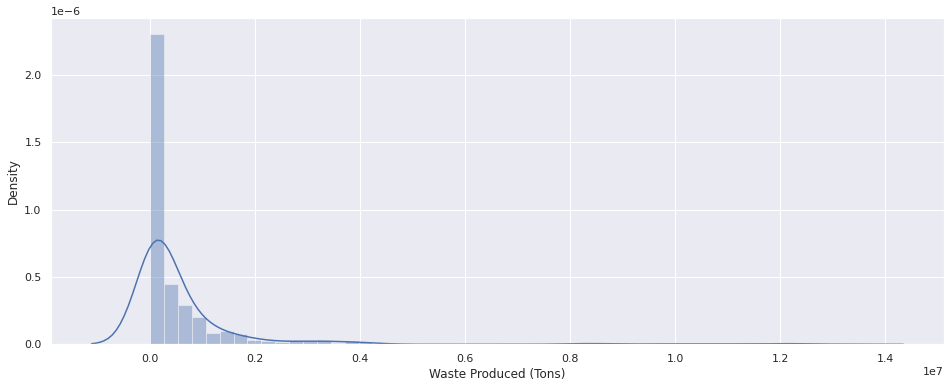

In [ ]:
plt.figure(figsize=(16, 6))
sns.distplot(complete_feature_df['Waste Produced (Tons)'], kde=True);

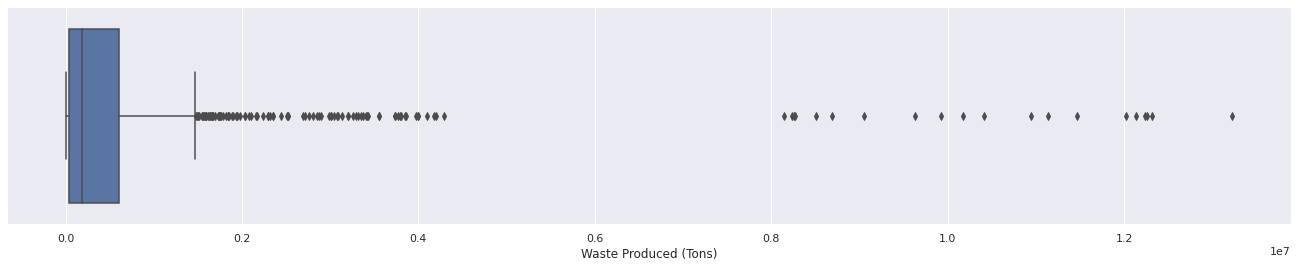

In [ ]:
plt.figure(figsize=(23, 4))
box = sns.boxplot(x='Waste Produced (Tons)', data=complete_feature_df)

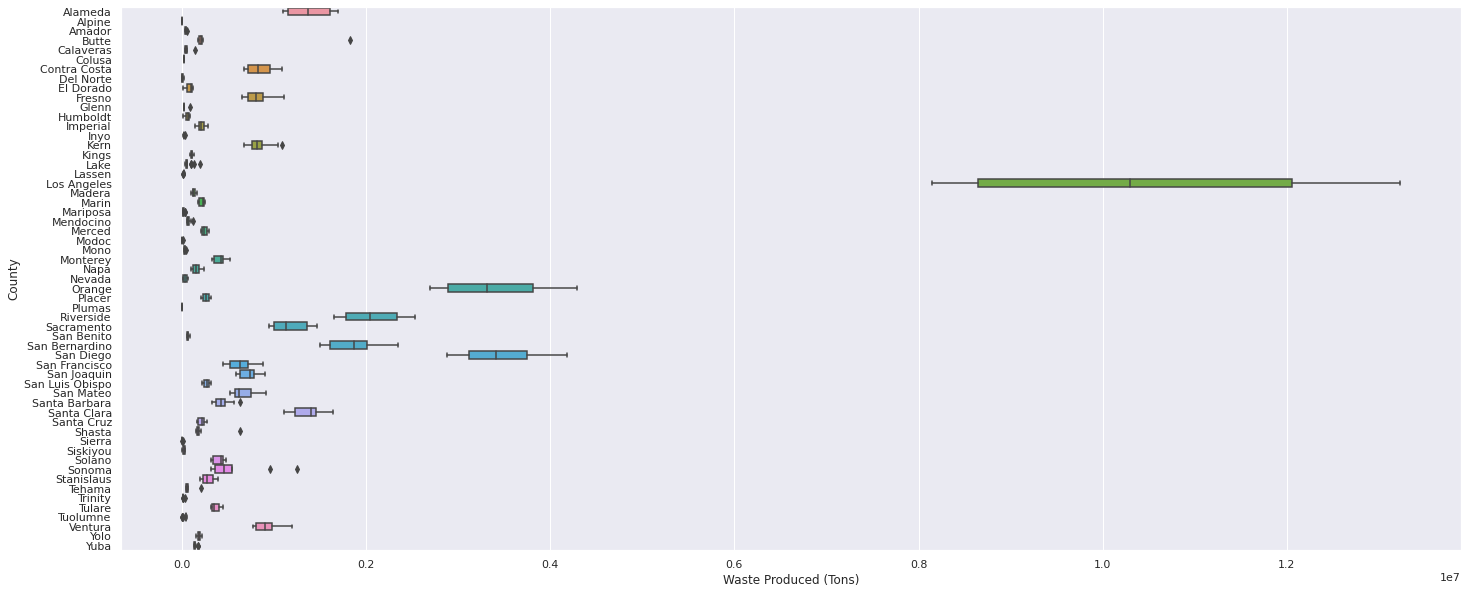

In [ ]:
plt.figure(figsize=(24, 10))
sns.boxplot(x='Waste Produced (Tons)', y='County', data=complete_feature_df)

Essentially these figures help to demonstrate the vast range of Waste Produced per county in California. A majority of the reported tons of waste is produced by Los Angeles County, which does logically follow with metropoltian areas producing more waste due to variety of factors i.e. population density, etc. which will be further explored. A majority of counties in California produce waste by tons on a much smaller scale as the highest frequency of waste produced is 0.025 tons and less annually, however, counties like LA county are powerful outliers which results is such a such an vast distribution of waste produced for California overall.

# Waste Generated over Time

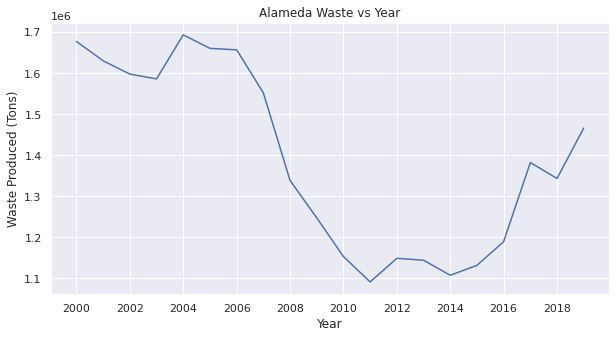

In [ ]:
alameda = complete_feature_df[complete_feature_df.County == "Alameda"]

plt.figure(figsize = (10,5))
plt.plot(alameda["Year_DateTime"], alameda["Waste Produced (Tons)"])
plt.ylabel("Waste Produced (Tons)")
plt.xlabel("Year")
plt.title("Alameda Waste vs Year");

In [ ]:
counties_list = complete_feature_df.County.unique()
counties_list

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura',
       'Yolo', 'Yuba'], dtype=object)

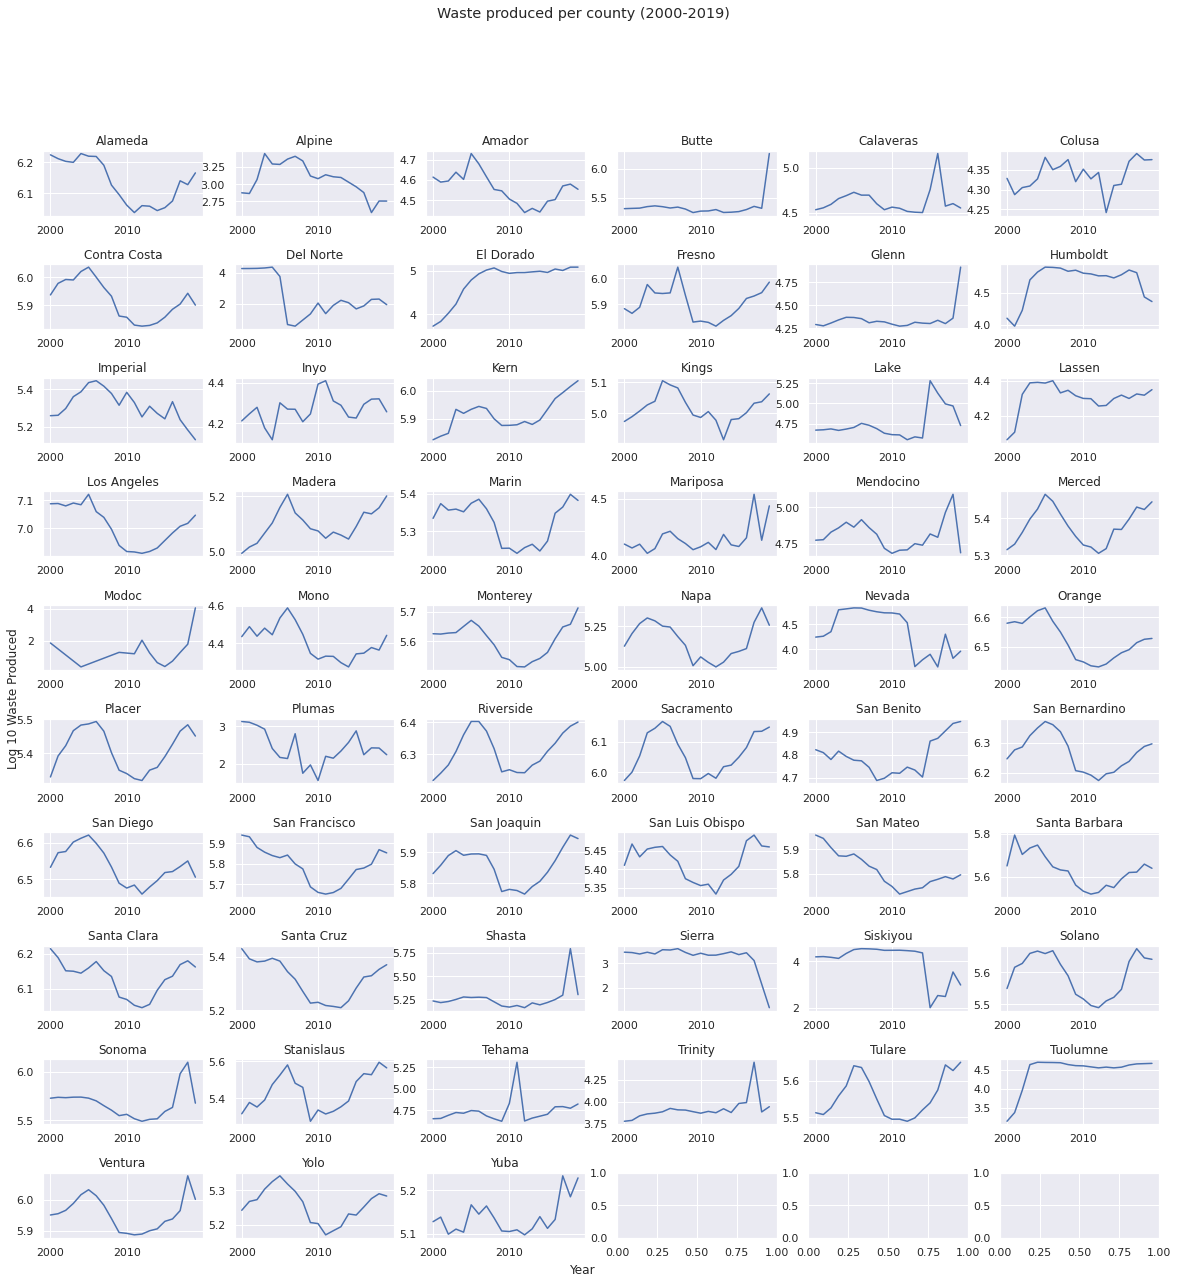

In [ ]:
fig, axs = plt.subplots(10, 6, figsize=(20,20), sharex=False, sharey=False)

county_idx=0
for ax in axs.ravel():
    if county_idx < len(counties_list):
        county = counties_list[county_idx]
        county_df = complete_feature_df[complete_feature_df.County == county]
        ax.plot(county_df["Year"], county_df["Log Waste Produced"])
        ax.set_title("{}".format(county))
        county_idx+=1

fig.suptitle("Waste produced per county (2000-2019)")
fig.text(0.1, 0.5, 'Log 10 Waste Produced', va='center', rotation='vertical')
fig.text(0.5, 0.1, 'Year', ha='center')
plt.subplots_adjust(hspace=.75)

In [ ]:
fig = px.line(complete_feature_df, x="Year", y="Waste Produced (Tons)", color='County')
fig.show()

Most counties produced less waste during the time period of the recession starting from 2006 which was the beginning of the subprime housing crsis which resulted in the Great Recession. During the Great Recession Counties produced less waste, however as economic stability was regained as time passed so did the the total amount of waste produced.

# Average Waste Vs. Energy

In [ ]:
average_data_per_county = complete_feature_df.groupby("County").agg(np.mean)
average_data_per_county.reset_index(inplace=True)
average_data_per_county.head()

,County,Year,Waste Produced (Tons),Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units),Log Waste Produced
0,Alameda,2009.5,1.388987e+06,1531802.10,2072.747828,2958.846113,7780.45,217597.40,349869.80,6.137181
1,Alpine,2009.5,1.337510e+03,1197.40,1.621768,9.547645,41.35,637.85,1017.45,3.068278
2,Amador,2009.5,3.680986e+04,36917.45,62.089963,136.560188,1446.60,1200.55,14680.50,4.559279
3,Butte,2009.5,2.817851e+05,217257.10,132.760410,703.726358,13976.10,18549.35,60858.40,5.349436
4,Calaveras,2009.5,4.551152e+04,44453.00,43.580945,193.629777,2224.00,1000.00,23492.80,4.626993


In [ ]:
fig = px.scatter(average_data_per_county, x="Electricity Usage (GWh)", y="Waste Produced (Tons)",
                 size="Population", hover_data=["County"], color="County",
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Electricity Usage (GWh)": "Average Electricity Usage (gWh)",
                     "Population": "Average Population"
                 },
                 title="Average Yearly CA County Waste vs Electricity Usage & Population (2000-2019)"
                )
fig.show()

fig2 = px.scatter(average_data_per_county, x="Electricity Usage (GWh)", y="Waste Produced (Tons)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County",
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Electricity Usage (GWh)": "Average Electricity Usage (gWh)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Average Yearly CA County Waste vs Electricity Usage & Population Density (2000-2019)"
                )
fig2.show()


The average yearly waste produced appears positively correlated with the average electricity usage. Althought it is fair to say that CA counties with larger populations are more likely to consume more electricity and produce more waste annually, regardless of whether the region is urban or rural, total population is of greater relevance than population density.

# Geospatial Visualization By County

In [ ]:
GEOSPATIAL_DATA_PATH = DATA_PATH + "geospatial-data/"
ca_counties_geojson_path = GEOSPATIAL_DATA_PATH + "ca-counties.geojson"

complete_feature_df_2019 = complete_feature_df[complete_feature_df.Year == 2019]
complete_feature_df_2019["Waste Produced"] = np.log(complete_feature_df_2019["Waste Produced (Tons)"])
complete_feature_df_2019.head()

waste_heat_map = folium.Map(location=(37.5, -119.5), zoom_start=6, min_zoom=5, tiles='cartodbpositron')

folium.Choropleth(
    geo_data=ca_counties_geojson_path,
    data=complete_feature_df_2019,
    columns=['County', 'Waste Produced'],
    key_on='feature.id',
    fill_color='BuPu',
    legend_name='Waste Produced (Log Tons)'
).add_to(waste_heat_map)

waste_heat_map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
GEOSPATIAL_DATA_PATH = DATA_PATH + "geospatial-data/"
ca_counties_geojson_path = GEOSPATIAL_DATA_PATH + "ca-counties.geojson"

feature_inc = pd.read_csv(DATA_PATH + 'median_income_data.csv')

feature_inc_2019 = feature_inc[feature_inc.Year == 2019]
feature_inc_2019.head()

waste_heat_map = folium.Map(location=(37.5, -119.5), zoom_start=6, min_zoom=5, tiles='cartodbpositron')

folium.Choropleth(
    geo_data=ca_counties_geojson_path,
    data=feature_inc_2019,
    columns=['County', 'Median Income'],
    key_on='feature.id',
    fill_color='Greens',
    legend_name='Median Income'
).add_to(waste_heat_map)

waste_heat_map.save(DATA_PATH + 'ca-waste.html')

waste_heat_map

These visualizations help contextualize the actual areas of CA county's waste output and the impact of wealth. The urban, coastal metropolitan areas have greater wealth demonstrated by their comparatively higher median income, but they do not produce greater amounts of waste overall compared to lower income counties.

# Housing Analysis

In [ ]:
housing_type_county = complete_feature_df[['County','Year','Waste Produced (Tons)','Mobile Homes (units)','Multi-Family (units)','Single Family (units)', 'Population Density (Person per Square Mile)']]
housing_type_county.head()

,County,Year,Waste Produced (Tons),Mobile Homes (units),Multi-Family (units),Single Family (units),Population Density (Person per Square Mile)
0,Alameda,2000.0,1676429.25,7631,203132,328399,1953.856459
1,Alpine,2000.0,745.00,62,561,883,1.636125
2,Amador,2000.0,41059.90,1488,913,12563,59.033267
3,Butte,2000.0,203896.87,14199,17317,53845,124.152744
4,Calaveras,2000.0,34110.44,2235,856,19777,39.758434


In [ ]:
fig3 = px.scatter(average_data_per_county, x="Mobile Homes (units)", y="Waste Produced (Tons)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County", 
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Mobile Homes": "Mobile Homes (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Average Yearly CA County Waste vs Mobile Homes & Population Density (2000-2019)"
                )
fig3.show()
fig4 = px.scatter(average_data_per_county, x="Single Family (units)", y="Waste Produced (Tons)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County", 
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Single Family Homes": "Single Family (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Average Yearly CA County Waste vs Single Family Homes & Population Density (2000-2019)"
                )
fig4.show()

fig5 = px.scatter(average_data_per_county, x="Multi-Family (units)", y="Waste Produced (Tons)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County",
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Multi-Family Homes": "Multi-Family (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Average Yearly CA County Waste vs Multi-Family Homes & Population Density (2000-2019)"
                )
fig5.show()
#scatter plot comparing the different housing types and the trash they produce

Interesting the higher the population density in general does not mean that there will be a greater number of homes regardless of the type. This is demonstrated by San Francisco having a high population density but having less housing units in all three categories compared to other counties i.e. Los Angeles, Orange, or San Diego. Perhaps though we can simply consider San Francisco as an outlier due to its county having high housing demand due to variety of factors that make it desirable i.e. Silicon valley, culture, etc. but restriction building regulations resulting in little on the housing market.

Mobile Homes clearly produce the most amount of among the housing types. The total amount of trash produced by Mobile Homes in Orange County was equal to the total amount of trash produced by Mobile Homes in Orange County, despite the total number of Mobile homes being 20 times the total number of Single Family homes. The Multi-family home units produced nearly double the total amount of trash per unit compared to the Single-family homes. Thus overal Single Family Homes produced the least amount of trash per unit, although since Multi-family home units house more people than Single-family home units, per person the total amount of trash produced may be less in Multi-family home units.

# Income Analysis

In [ ]:
features_and_inc = median_income.merge(complete_feature_df, on = ['County', 'Year'], how = 'inner')
features_and_inc.to_csv(DATA_PATH + "complete_feature_and_income.csv", index=False)

In [ ]:
features_inc = pd.read_csv(DATA_PATH + 'complete_feature_and_income.csv')
features_inc.head()

,County,Year,Median Income,Waste Produced (Tons),Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units),Year_DateTime,Log Waste Produced
0,Alameda,2000.0,37580.0,1676429.25,1443939.0,1953.856459,2926.106226,7631,203132,328399,2000-01-01,6.224385
1,Alpine,2000.0,29333.0,745.00,1208.0,1.636125,6.247035,62,561,883,2000-01-01,2.872156
2,Amador,2000.0,31806.0,41059.90,35100.0,59.033267,127.238094,1488,913,12563,2000-01-01,4.613418
3,Butte,2000.0,24513.0,203896.87,203171.0,124.152744,705.766172,14199,17317,53845,2000-01-01,5.309411
4,Calaveras,2000.0,31420.0,34110.44,40554.0,39.758434,173.578409,2235,856,19777,2000-01-01,4.532887


In [ ]:
fig = px.line(features_inc, x="Year", y="Median Income", color='County')
fig.show()

This figure demonstrates how generally median income has increased for each california county over time, although the Great Recession caused a minor dip in 2007-2009.

In [ ]:
fig6 = px.scatter(features_inc, x="Median Income", y="Mobile Homes (units)", size = 'Population Density (Person per Square Mile)',
                  hover_data=["County"], color="County", 
                  labels={
                  
                     "Median Income": "Median Income",
                     #"Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Mobile Homes": "Mobile Homes (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Mobile Homes in CA Counties Considering Median Income & Population Density"
                )
fig6.show()
fig7 = px.scatter(features_inc, x="Median Income", y="Single Family (units)", size = 'Population Density (Person per Square Mile)',
                  hover_data=["County"], color="County", 
                 labels={
                 
                     "Median Income": "Median Income",
                     #"Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Single Family Homes": "Single Family (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Single Family Homes in CA Counties Considering Median Income & Population Density"
                )
fig7.show()

fig8 = px.scatter(features_inc, x="Median Income", y="Multi-Family (units)", size = 'Population Density (Person per Square Mile)',
                  hover_data=["County"], color="County", 
                 labels={
                 
                     "Median Income": "Median Income",
                     #"Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Multi-Family Homes": "Multi-Family (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Multi-Family Homes in CA Counties Considering Median Income & Population Density"
                )
fig8.show()

In general the trend is that CA counties with lower population densities have have more mobile homes, fewer single family homes, and even fewer multi-family home units compared to counties with higher population densities. Essentially there is an inverse relationship between CA counties of low and high population density and housing types. As the median income progressed the more higher frequency of multi-family homes, and then fewer single family homes, and then even fewer mobile homes; this logically makes sense as one with enough income would typically invest in more expensive and larger real estate to reside in.

In [ ]:
fig = px.scatter(features_inc, x="Median Income", y="Waste Produced (Tons)",
                 size="Population", hover_data=["County"], color="County",
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Median Income": "Median Income",
                     "Population": "Average Population"
                 },
                 title="Average Yearly CA County Waste Vs Median Income & Population (2000-2019)"
                )
fig.show()

fig2 = px.scatter(features_inc, x="Median Income", y="Waste Produced (Tons)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County", 
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Median Income": "Median Income",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Average Yearly CA County Waste Vs Median Income & Population Density (2000-2019)"
                )
fig2.show()

These visualizations demonstrate there is no clear relationship between median income and average waste produced by a CA County, whether they be metropolitans with high population densities or more rural counties with low population densities.

In [ ]:
fig = px.scatter(features_inc, x="Median Income", y="Electricity Usage (GWh)",
                 size="Population", hover_data=["County"], color="County",
                 labels={
                     "Electricity Usage" : "Electricity Usage (GWh)",
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Median Income": "Median Income",
                     "Population": "Average Population"
                 },
                 title="Electricity Usage Vs Median Income & Population (2000-2019)"
                )
fig.show()

fig2 = px.scatter(features_inc, x="Median Income", y="Electricity Usage (GWh)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County", 
                 labels={
                     "Electricity Usage" : "Electricity Usage (GWh)",
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Median Income ($USD)": "Median Income",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Electricity Usage Vs Median Income & Population Density (2000-2019)"
                )
fig2.show()

fig, axs = plt.subplots(10, 6, figsize=(20,20), sharex=False, sharey=False)

county_idx=0
for ax in axs.ravel():
    if county_idx < len(counties_list):
        county = counties_list[county_idx]
        county_df = features_inc[features_inc.County == county]
        ax.plot(county_df["Median Income"], county_df["Electricity Usage (GWh)"])
        ax.set_title("{}".format(county))
        county_idx+=1

fig.suptitle("Electricity Usage As Median Income Rises")
fig.text(0.1, 0.5, 'Electricity Usage (GWh)', va='center', rotation='vertical')
fig.text(0.5, 0.1, 'Median Income', ha='center')
plt.subplots_adjust(hspace=.75)

These visualizations demonstrate there is no clear relationship between median income and electricity (GWh) used by a CA County, whether they be metropolitans with high population densities or more rural counties with low population densities. Perhaps yu could argue there is a very mild increase with energy consumption as median income within the county increases, but otherwise it's relatively constant even with drastic increases in median income. The only other conclusion that can be drawn is that CA counties with larger total populations are more likely to consume more electricity annually, regardless of whether the region is urban or rural, total population is of greater relevance than population density.

#**1.8 Forecasting and Prediction Modeling**

## Load in data

In [ ]:
complete_feature_df = pd.read_csv(DATA_PATH + "complete_feature_df.csv")
complete_feature_df.head()

,Year,Waste Produced (Tons),County,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
0,2000.0,1676429.25,Alameda,1443939.0,1953.856459,2926.106226,7631,203132,328399
1,2000.0,745.00,Alpine,1208.0,1.636125,6.247035,62,561,883
2,2000.0,41059.90,Amador,35100.0,59.033267,127.238094,1488,913,12563
3,2000.0,203896.87,Butte,203171.0,124.152744,705.766172,14199,17317,53845
4,2000.0,34110.44,Calaveras,40554.0,39.758434,173.578409,2235,856,19777


In [ ]:
complete_feature_df.set_index("Year", inplace=True)
complete_feature_df.head(3)

,Waste Produced (Tons),County,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,,,
2000.0,1676429.25,Alameda,1443939.0,1953.856459,2926.106226,7631,203132,328399
2000.0,745.00,Alpine,1208.0,1.636125,6.247035,62,561,883
2000.0,41059.90,Amador,35100.0,59.033267,127.238094,1488,913,12563


## Feature, target split

In [ ]:
target = complete_feature_df[["Waste Produced (Tons)"]]
feature_df = complete_feature_df.drop(columns="Waste Produced (Tons)")
feature_df.head(2)

,County,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,,
2000.0,Alameda,1443939.0,1953.856459,2926.106226,7631,203132,328399
2000.0,Alpine,1208.0,1.636125,6.247035,62,561,883


In [ ]:
target.head(2)

,Waste Produced (Tons)
Year,
2000.0,1676429.25
2000.0,745.00


## Preprocessing

### One hot encoding


We would like to include the county as a categorical feature in our model, so we will one hot encode the features. While it is usually common practice to have k-1 one hot encoded columns , in our case number of counties-1, to avoid collinearity we decided for the regression methods we are using it is best to keep full rank. In regularized regression, the intercept coefficient is not penalized, so if you are inferring the effect of a level as not part of the intercept, its hard to say you are penalizing all levels equally. For this reason, we include all the levels, so each is symmetric with respect to the penalty.

However, we acknowledge the issue of multicollinearlity from keeping all k levels for the OLS model. This might cause OLS to perform worse than the regularization methods given the same data frame and may lower our confidence our choice of the optimal model.


In [ ]:
feature_df = pd.get_dummies(feature_df, columns=["County"])#, drop_first = True)
feature_df.head()

,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units),County_Alameda,County_Alpine,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,County_El Dorado,County_Fresno,County_Glenn,County_Humboldt,County_Imperial,County_Inyo,County_Kern,County_Kings,County_Lake,County_Lassen,County_Los Angeles,County_Madera,County_Marin,County_Mariposa,County_Mendocino,County_Merced,County_Modoc,County_Mono,County_Monterey,County_Napa,County_Nevada,County_Orange,County_Placer,County_Plumas,County_Riverside,County_Sacramento,County_San Benito,County_San Bernardino,County_San Diego,County_San Francisco,County_San Joaquin,County_San Luis Obispo,County_San Mateo,County_Santa Barbara,County_Santa Clara,County_Santa Cruz,County_Shasta,County_Sierra,County_Siskiyou,County_Solano,County_Sonoma,County_Stanislaus,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000.0,1443939.0,1953.856459,2926.106226,7631,203132,328399,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000.0,1208.0,1.636125,6.247035,62,561,883,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000.0,35100.0,59.033267,127.238094,1488,913,12563,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000.0,203171.0,124.152744,705.766172,14199,17317,53845,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000.0,40554.0,39.758434,173.578409,2235,856,19777,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Train test split

In [ ]:
feature_df.head()

,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units),County_Alameda,County_Alpine,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,County_El Dorado,County_Fresno,County_Glenn,County_Humboldt,County_Imperial,County_Inyo,County_Kern,County_Kings,County_Lake,County_Lassen,County_Los Angeles,County_Madera,County_Marin,County_Mariposa,County_Mendocino,County_Merced,County_Modoc,County_Mono,County_Monterey,County_Napa,County_Nevada,County_Orange,County_Placer,County_Plumas,County_Riverside,County_Sacramento,County_San Benito,County_San Bernardino,County_San Diego,County_San Francisco,County_San Joaquin,County_San Luis Obispo,County_San Mateo,County_Santa Barbara,County_Santa Clara,County_Santa Cruz,County_Shasta,County_Sierra,County_Siskiyou,County_Solano,County_Sonoma,County_Stanislaus,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000.0,1443939.0,1953.856459,2926.106226,7631,203132,328399,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000.0,1208.0,1.636125,6.247035,62,561,883,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000.0,35100.0,59.033267,127.238094,1488,913,12563,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000.0,203171.0,124.152744,705.766172,14199,17317,53845,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000.0,40554.0,39.758434,173.578409,2235,856,19777,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


80% training 20% test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, target, test_size=0.2, random_state=42)

In [ ]:
X_train.head(3)

,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units),County_Alameda,County_Alpine,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,County_El Dorado,County_Fresno,County_Glenn,County_Humboldt,County_Imperial,County_Inyo,County_Kern,County_Kings,County_Lake,County_Lassen,County_Los Angeles,County_Madera,County_Marin,County_Mariposa,County_Mendocino,County_Merced,County_Modoc,County_Mono,County_Monterey,County_Napa,County_Nevada,County_Orange,County_Placer,County_Plumas,County_Riverside,County_Sacramento,County_San Benito,County_San Bernardino,County_San Diego,County_San Francisco,County_San Joaquin,County_San Luis Obispo,County_San Mateo,County_Santa Barbara,County_Santa Clara,County_Santa Cruz,County_Shasta,County_Sierra,County_Siskiyou,County_Solano,County_Sonoma,County_Stanislaus,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014.0,261001.0,501.625954,652.468169,1975,29990,79691,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012.0,2244472.0,311.451915,6672.551485,78921,129326,599723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018.0,44595.0,7.103501,221.879329,3594,3245,17346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head(3)

,Waste Produced (Tons)
Year,
2014.0,177022.31
2012.0,1744578.50
2018.0,3439.56


# Part 1: Predicting waste generation for a given California county over the course of one year  


## Model selection training on the entire dataset

The goal of both prediction questions 1 and 2 is to predict the amount of waste produced by a given county in California over the course of a year. Prediction question 1 trains a model on all county data over the years 2000-2019, while prediction question 2 trains a model on data from one individual county between 2000-2019. Our motiviation for asking these questions is to understand how scope might effect the predictive power of OLS, Lasso, Ridge, Elastic Net, and Random Forest Decisions Trees when predicting total waste generation in a given California county. In comparing the performance of these models we aim to answer the following questions:

- Does understanding the behavior of waste generation in a given year across the state of California as a whole improve our predictions of waste generation for a specific county? 

- More generally, narrowly specific research questions often have less relevant data available to answer them. Is the trade off between data quantity and questions of a smaller scope reasonable when making predictive models? 

To compare linear regression models to random forests decision trees, we have implemented multiple rounds of model selection using cross validation. Firstly, for our linear regression models, we have tuned hyperparameters (alpha) using cv to find the optimal model for a given method (OLS, Ridge, Lasso, Elastic Net). We then compared the best cross validated scores between each model to select the best performing linear regression model. A similar process for tuning was used for random forests. Random forests and the best linear model were then compared using the testing data set. We used the best performing model of these two options to predict on the entire data set.

## Linear regression methods

We have fit our data to least squares, ridge, lasso, and elastic net regression. Ordinary least squares regression does not use any regularization, so we do not need do tune any hyperparameters on this model. However, we do need to tune the alpha hyperparameter used to fit the ridge, lasso, and elastic net models. In the scikit packages, alpha is the lambda value of the regularization term (larger values equate to a larger penalty for large coefficient values). Tuning this hyperparameter prevents the model from overfitting, thus balancing the bias variance trade off.  

As mentioned above, for each model that uses regularization, we have found the optimal lambda value which minimizes the model's mse. We have used scikit packages to perform cross validation on a list of alpha values, and subsequently fit the model using the optimal alpha identified. 


**Justification for parameter inputs:**


* **CV**: For this prediction question, we are training on the full data set (all counties over the years 2000-2019). The training data set consists of ~900 observations, which we believe is large enough to use k-fold CV rather than LOOCV. We chose the standard k=5 which will split the training data into 5 splits (roughly replicating the 80% 20% train test split of out data). For each fold a different split of the data is used as the test set while the rest is used to train the model. The 5 errors are then averaged and is used as the score of the model for the given alpha value
* **GridSearchCV** This package performs a GridSearch and chooses the alpha whose model had lowest mae error which is specified as the scoring input.
* **alpha**: we have tested alpha values from 0 to 5 for ridge regression. With so few features, a high penality/large alpha is not necessary. If alpha is too large, the model may be underfit. For lasso, we expected low values of alpha, as lasso can perform feature selection. According to online resources, lasso is generally optimized ~ 1/# observations ~ 1/1000. However, we found smaller values of alpha were failing to converge while very large values of alpha scored better. This would suggest the data does not have many meaningful features. Upon reflection, having the one hot encoded features for each county might be the reason such a large alpha is needed to eliminate the coefficients. 
* **normalize**: we must normalize the features for models that use regularization in order to prevent features with a large range, such as housing units, from dominating the equation.
* **scorer**: the models have been scored using mean absolute error. We believe this is a good loss function because MAE is more robust to outliers (does not penalize as harshly for large differences). In our data set, some counties vary significantly in the amount of waste they produce, creating outliers and a wide range of values. We used MAE to select the final model and the model's hyperparameter. Using MSE to tune and MAE is ineffective because a dataset containing a few extreme outliers in an MSE fitted equation can be pulled arbitrarily far away from the MAE equation.


In [ ]:
def score_cv_model(Model, X_train, y_train, X_test, y_test, alphas):
  """ The function fits a given model whose hyperparamteters have been tuned using k=5 fold cross validation to the
      inputted X and y training data then outputs the cross-validated mae score and the tuned model

      Model = model to fit the data on
      X_train = the training data feature matrix
      y_train = training data target variable (single column)
      X_test  = test data feature matrix
      y_test = test data target variable (single coulmn)
      alphas = an array of alpha values to perform the grid search on 
  """
  #splits the X_train data into 5 splits
  kf = KFold(n_splits = 5, shuffle = True)

  if Model == LinearRegression:
    modelcv = Model()
    modelcv.fit(X_train, y_train)
    #cv score on the training data 
    score = np.mean(cross_val_score(modelcv, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = kf )*-1)

  else:
    model = Model()
    modelcv = GridSearchCV(estimator = model, param_grid = alphas, scoring = 'neg_mean_absolute_error', cv = kf)
    modelcv.fit(X_train, y_train) 
    print(modelcv.best_estimator_)
    #cv score of the tuned regression model 
    score = modelcv.best_score_*-1

  return score, modelcv

In [ ]:
#defines the range of alpha values to perform the grid search for each kind of regression model 
ridge_alphas = {'normalize': [True],'alpha': np.arange(0.001,1,.0005), 'tol': [0.00001]}
lasso_alphas = {'normalize': [True],'alpha': np.arange(1,50,1), 'max_iter': [100000]}
en_alphas = {'normalize': [True], 'alpha': np.arange(.1,5,.5), 'l1_ratio': np.arange(0.01,1,0.01),'max_iter': [100000]}

In [ ]:
ols_score, ols = score_cv_model(LinearRegression, X_train, y_train, X_test, y_test, 0)
ridge_score, ridge = score_cv_model(Ridge, X_train, y_train, X_test, y_test, ridge_alphas) 
lasso_score, lasso = score_cv_model(Lasso, X_train, y_train, X_test, y_test, lasso_alphas) 
en_score, en = score_cv_model(ElasticNet, X_train, y_train, X_test, y_test, en_alphas) 

print('cv ols score: ', ols_score)
print('cv ridge score: ', ridge_score)
print('cv lasso score: ', lasso_score)
print('cv elastic net score :', en_score)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=1e-05)
Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.99,
           max_iter=100000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
cv ols score:  98353.89402913132
cv ridge score:  99933.10469578183
cv lasso score:  93019.60205322846
cv elastic net score : 133089.1807911723


Of the linear regression models, it seems that lasso regression performs the best. To select our final model, we compared the test error for the lasso regression model and the random forest model.

## Decision tree ensemble method

- Note: Decision trees are supposed to be able to handle categorical features but this is [not supported in sklearn](https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree) so we need to one hot encode

In [ ]:
random_forest_model = RandomForestRegressor()

possible_hyperparams = { 
    'n_estimators': [25, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,10)]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=possible_hyperparams, cv=5, scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(X_train, y_train.values.ravel()) # need to call this ravel function because of https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
rf_best_score = -grid_search.best_score_ # needs to be negated because of https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error
best_rf_model = grid_search.best_estimator_
print('best rf model:', best_rf_model)
print('best random forest cv score: ', rf_best_score)

best rf model: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
best random forest cv score:  57707.981555668346


## Comparing final models

In [ ]:
def model_test_score(model, X_train, y_train):
  model.fit(X_train, y_train.values.ravel())
  y_pred = model.predict(X_test)

  residual = y_pred - y_test.to_numpy().flatten()
  mae = mean_absolute_error(y_test,y_pred)

  return mae, residual, y_pred

In [ ]:
ols_test, ols_res, ols_y = model_test_score(ols, X_train, y_train)
ridge_test, ridge_res, ridge_y = model_test_score(ridge, X_train, y_train)
lasso_test, lasso_res, lasso_y = model_test_score(lasso, X_train, y_train)
en_test, en_res, en_y = model_test_score(en, X_train, y_train)
rf_tree_test, rf_tree_res, rf_tree_y = model_test_score(best_rf_model, X_train, y_train)

print('ols test score: ', ols_test)
print('ridge test score: ',ridge_test)
print('lasso test score: ',lasso_test)
print('elastic net test score: ',en_test)
print('random forest tree test score: ',rf_tree_test)

ols test score:  81396.54958893513
ridge test score:  79909.7392343085
lasso test score:  76035.27258601699
elastic net test score:  114219.12198183598
random forest tree test score:  46831.75207087529


The random forest tree has the lowest MAE so we chose it as our best performing model. Random forest performing as the best model implies that our features have a non-linear relationship with the target variable. Out of curiosity, we also calculated the residuals, predicted y values, and tested MAE for all of the models. We later plotted the predicted y values and residuals to help visualize the difference between each model.

It can also be beneficial to compare cross validated MAE to test MAE. A large discrepency in MAE and test error may suggest the model is overfitting. 

In [ ]:
print('Difference between cv MAE and test MAE')
print('ols: ',ols_score - ols_test)
print('ridge: ', ridge_score - ridge_test)
print('lasso: ',lasso_score-lasso_test)
print('en: ', en_score - en_test)
print('rf: ', rf_best_score - rf_tree_test)

Difference between cv MAE and test MAE
ols:  16957.34444019619
ridge:  20023.36546147334
lasso:  16984.32946721147
en:  18870.058809336304
rf:  10876.229484793053


Random forests also has the smallest difference between cross validated training MAE and test MAE, making it a very strong candidate as the best performing model.

## Plot of errors for each model



The following plot is a violin plot of the errors for each model. The violin plot will show the distribution of errors, with a larger distribution indicating more variance in the model, and errors concentrated on the ends of the distribution implying more bias (larger error values).

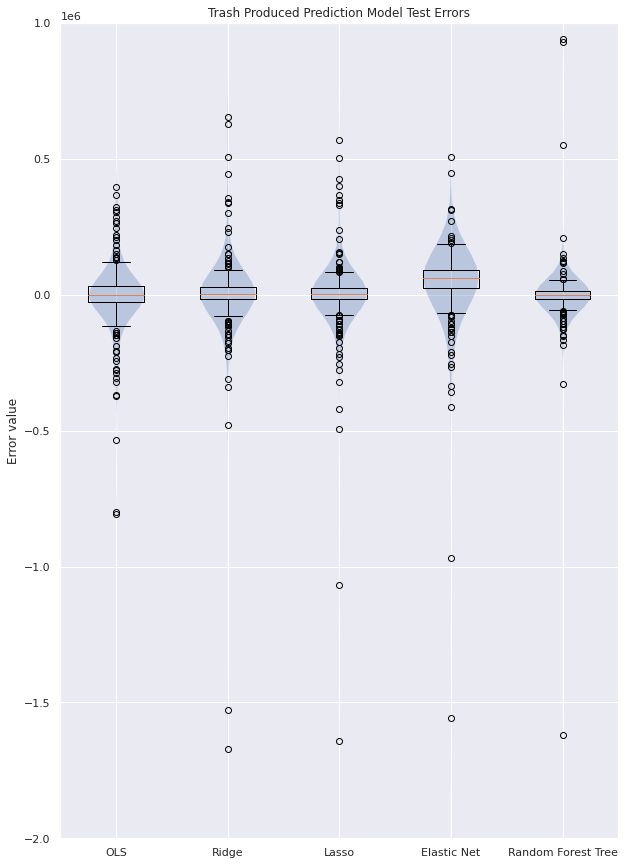

In [ ]:
data = [ols_res,ridge_res,lasso_res,en_res,rf_tree_res]

fig, ax = plt.subplots(figsize=(10,15))

ax.set_title('Trash Produced Prediction Model Test Errors')
ax.set_ylabel('Error value')
xticklabels=['OLS','Ridge', 'Lasso', 'Elastic Net','Random Forest Tree']
ax.set_xticklabels(xticklabels)
plt.ylim(-2*10**6,1*10**6)
ax.boxplot(data, autorange=False)
ax.violinplot(data, showextrema=False)
plt.show()

Based on the violin plot, the OLS model seems to have the most bias, with errors concentrated around larger values. Elastic net seems to have the widest distribution, implying it has more variance.

The following is a plot of the residuals vs. electricity usage. The residuals should have no relationship with the x features.

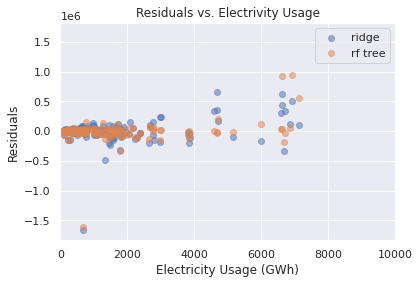

In [ ]:
plt.scatter(x = X_test.iloc[:,2], y = ridge_res, label = 'ridge', alpha = 0.5)
plt.scatter(x = X_test.iloc[:,2], y = rf_tree_res, label = 'rf tree', alpha = 0.5)
plt.xlabel('Electricity Usage (GWh)')
plt.ylabel('Residuals')
plt.xlim(0,10000)
#plt.ylim(2*10**6,-2*10**6)
plt.legend()
plt.title('Residuals vs. Electrivity Usage')
plt.show();

It appears that our model might be predicting worse for higher electricity usage.

The following code plots the actual vs. predicted trash produced for the full data set and test data set for each of the models. 

In [ ]:
def plot_model_prediction(model, X, y, label):
  model.fit(X_train, y_train.values.ravel())
  y_pred = model.predict(X)
  plt.scatter(y_pred,y, label = label, alpha = 0.5)

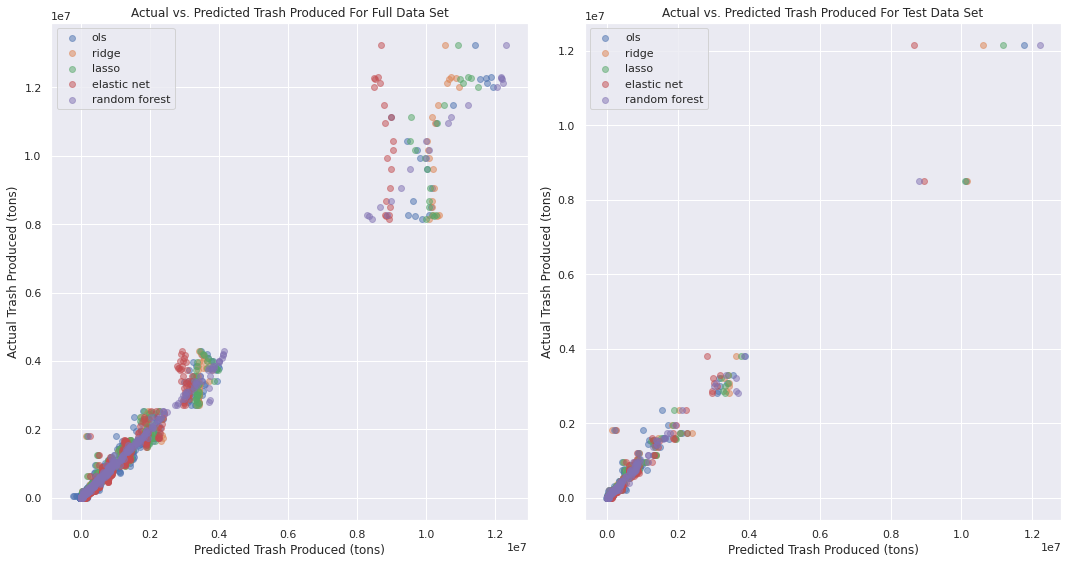

In [ ]:
models = {'ols': ols, 'ridge': ridge, 'lasso': lasso, 'elastic net': en, 'random forest': best_rf_model }

plt.figure(figsize=(15,8))
#plotting the actual vs. predicted values for each model predicting on the full data set
plt.subplot(121)
for model in models.keys():
  plot_model_prediction(models[model], feature_df, target, model)
plt.legend()
plt.xlabel('Predicted Trash Produced (tons)')
plt.ylabel('Actual Trash Produced (tons)')
plt.title('Actual vs. Predicted Trash Produced For Full Data Set');

#plotting actual v. predicted models predicting on the test data set
plt.subplot(122)
for model in models.keys(): 
  plot_model_prediction(models[model], X_test, y_test,model)

plt.legend()
plt.xlabel('Predicted Trash Produced (tons)')
plt.ylabel('Actual Trash Produced (tons)')
plt.title('Actual vs. Predicted Trash Produced For Test Data Set')
plt.tight_layout()
plt.show();

From this plot, we can see the random forest decision tree is the best model. It is hard to compare the linear models based on this scatter plot, however we do see that all the models seem to not predict as well for large values of trash produced.

## Using best model to predict waste generated by Alameda and Tulare



To help visualze our model's performance for specific counties, we plotted the predicted waste generation in Alameda and Tulare county for each year from 2000-2019 against total observed waste (tons).

In [ ]:
best_model = best_rf_model

In [ ]:
best_model.fit(feature_df, target.values.ravel())
complete_feature_df["Predicted Waste Produced"] = best_model.predict(feature_df)
complete_feature_df.reset_index(inplace=True)
complete_feature_df.rename(columns={"Waste Produced (Tons)": "Observed Waste Produced"}, inplace=True)
predictions_observations = complete_feature_df[["Year", "County", "Observed Waste Produced", "Predicted Waste Produced"]]
predictions_observations.head()

,Year,County,Observed Waste Produced,Predicted Waste Produced
0,2000.0,Alameda,1676429.25,1.503630e+06
1,2000.0,Alpine,745.00,1.877355e+03
2,2000.0,Amador,41059.90,3.381938e+04
3,2000.0,Butte,203896.87,2.401586e+05
4,2000.0,Calaveras,34110.44,3.920682e+04


In [ ]:
def generate_prediction_plot(df, county):
    """Generates plotly line chart for a given county depicting observed waste trends
    and predicted values
    """
    county_preds_obs = county_preds_obs = df[df.County == county]
    observations = county_preds_obs["Observed Waste Produced"]
    predictions = county_preds_obs["Predicted Waste Produced"]

    fig = go.FigureWidget(data=[
      go.Scatter(x=county_preds_obs.Year, y=observations, 
                  mode='lines', line={'dash': 'solid'}, name="Observed"),
      go.Scatter(x=county_preds_obs.Year, y=predictions, 
                  mode='lines', line={'dash': 'dash'}, name="Predicted")
    ])
    fig.update_xaxes(title_text='Year')
    fig.update_yaxes(title_text='Waste Produced (Tons)')
    fig.update_layout(title=county + " Observed and Predicted Values")
    return fig

In [ ]:
fig = generate_prediction_plot(predictions_observations, "Alameda")
fig.show()

In [ ]:
fig = generate_prediction_plot(predictions_observations, "Tulare")
fig.show()

Random Forests does a pretty good job of predicting waste generation in Alameda county, at the risk of possibly overfitting the data. The predictions for Tulare county seem to be much less accurate.

# Error Analysis and Limitations 
**Potential Errors from one-hot encoding in our models:**

* Significantly increased the size of our data frame, which in general is not ideal for machine learning problems as it can easily lead to overfit and high variance. 
*   Our encoded feature is counties, of which there are 57 unique values in the data set, which is relatively high cardinality. This created high variability in error between folds in our model as the test set might have included counties that were not present in the training set. 
* Upon reflection, it is not surprising that the tuned random forest tree performed the best because decision trees are more tolerant to categorical variables. However, high cardinality could have caused unique issues for the random forest tree model as well. Generating numerical dummy variables, might not have been practical because the number of possible splits grows non linearly with cardinality again leading to overfit and high variance. In addition, by one-hot encoding a categorical variable, we are inducing sparsity into the dataset which is undesirable. Furthermore, continuous variables will be given more importance than the dummy variables by the algorithm which will obscure the order of feature importance resulting in poorer performance.

When constructing our model, we believed it would be beneficial to have the county as a feature because the amount of trash produced is likely to vary by county. For example, this category might be able to capture information that is not included in our data frame like some counties having larger budgets or being physically larger. We also did not anticipate high cardinality to have such a large impact because each county should appear the same number of times in the full data set, however, it caused variability with the test train splits. In the future, our models could probably be improved by likelihood encoding, which substitutes each category by the average presence of the target in each category. Another alternative could be to include special groupings to preserve categorical variables when using lasso and elastic net regression. This could possibly help with the problem of high cardinality and overfit. We did not explore this option due to the limited time and scope of this project.

**Problems with using MAE loss to optimize lasso and elastic net parameters**

Throughout this modeling process, we ran into convergence errors when trying to tune the hyperparameters for lasso and elastic net regression. It is possible we were unable to converge because we used MAE as our loss function which is not differentiable and may not have a minimum value to converge to. The error suggested we increase the maximum number of iterations and make the tolerance lower. While this might remedy the error, increasing the number of iterations can be problematic for 2 reasons. First, increasing the iterations dramtically increased the run time. Second, this could lead to significant overfit of our models. We know that high values of alpha can underfit the model, but on the flip side, kicking the max iterations up runs the risk of over tuning hyperparameters to the training data.

---

---

# Part 2: Predicting waste generation for a given California county over the course of one year

##Model selection training on an **individual** county's dataset

For prediction question 1, we predicted the amount of waste produced by a given county in California over the course of a year by training on data from all counties within the state. For prediction question 2, we will train our models on data from only one individual county between 2000-2019. 

Do least squares, ridge, lasso, elastic net regression, and random forest decision trees better predict waste generation for a given county when trained on the full dataset or data from one individual county? To answer this question, we have carried out the same process from Part 1 on data from Alameda and Tulare county separately. Ultimately, the prediction graphs produced in Part 1 can be compared to the same graphs in Part 2, which were produced using data from only the county for which predictions are being made.

##Select County Data

In [ ]:
complete_feature_df = complete_feature_df.drop(columns=["Predicted Waste Produced"])
complete_feature_df.rename(columns={"Observed Waste Produced" : "Waste Produced (Tons)"}, inplace=True)
complete_feature_df.set_index("Year", inplace=True)
complete_feature_df.head(3)

,Waste Produced (Tons),County,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,,,
2000.0,1676429.25,Alameda,1443939.0,1953.856459,2926.106226,7631,203132,328399
2000.0,745.00,Alpine,1208.0,1.636125,6.247035,62,561,883
2000.0,41059.90,Amador,35100.0,59.033267,127.238094,1488,913,12563


In [ ]:
alameda_county_df = complete_feature_df.loc[complete_feature_df["County"] == 'Alameda']
alameda_county_df.head()

,Waste Produced (Tons),County,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,,,
2000.0,1676429.25,Alameda,1443939.0,1953.856459,2926.106226,7631,203132,328399
2001.0,1629208.38,Alameda,1457185.0,1971.780195,2745.201964,7661,204237,332390
2002.0,1596803.00,Alameda,1467063.0,1985.146545,2811.610305,7681,205444,335234
2003.0,1585190.61,Alameda,1467892.0,1986.268301,2937.070283,7695,207168,338009
2004.0,1692478.59,Alameda,1466407.0,1984.258883,2897.764371,7694,208691,340095


In [ ]:
tulare_county_df = complete_feature_df.loc[complete_feature_df["County"] == 'Tulare']
tulare_county_df.head()

,Waste Produced (Tons),County,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,,,
2000.0,324877.46,Tulare,368021.0,76.286115,961.793645,10705,16346,92277
2001.0,321266.80,Tulare,371479.0,77.002914,923.793519,10760,16432,93524
2002.0,334878.36,Tulare,377666.0,78.285402,941.862252,10611,16636,95010
2003.0,361310.10,Tulare,385769.0,79.965051,1037.993510,10459,16839,96587
2004.0,384676.32,Tulare,395127.0,81.904847,1046.677667,10311,17147,98389


##Feature, Target Split for Alameda and Tulare

In [ ]:
alameda_target = alameda_county_df[["Waste Produced (Tons)"]]
alameda_feature_df = alameda_county_df.drop(columns=["Waste Produced (Tons)", "County"])
alameda_feature_df.head(2)

,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,
2000.0,1443939.0,1953.856459,2926.106226,7631,203132,328399
2001.0,1457185.0,1971.780195,2745.201964,7661,204237,332390


In [ ]:
alameda_target.head(2)

,Waste Produced (Tons)
Year,
2000.0,1676429.25
2001.0,1629208.38


In [ ]:
tulare_target = tulare_county_df[["Waste Produced (Tons)"]]
tulare_feature_df = tulare_county_df.drop(columns=["Waste Produced (Tons)", "County"])
tulare_feature_df.head(2)

,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,
2000.0,368021.0,76.286115,961.793645,10705,16346,92277
2001.0,371479.0,77.002914,923.793519,10760,16432,93524


In [ ]:
tulare_target.head(2)

,Waste Produced (Tons)
Year,
2000.0,324877.46
2001.0,321266.80


## Train, Test Split for Alameda & Tulare

In [ ]:
X_train_alameda, X_test_alameda, y_train_alameda, y_test_alameda = train_test_split(alameda_feature_df, alameda_target, test_size=0.2, random_state=12)

In [ ]:
X_train_alameda.head(3)

,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,
2014.0,1590729.0,2152.484371,2891.232325,7838,223606,357504
2016.0,1632599.0,2209.140483,2917.342741,7855,225820,359987
2010.0,1510271.0,2043.613163,3021.008265,7827,220779,353242


In [ ]:
y_train_alameda.head(3)

,Waste Produced (Tons)
Year,
2014.0,1106585.54
2016.0,1188438.89
2010.0,1152323.90


In [ ]:
X_train_tulare, X_test_tulare, y_train_tulare, y_test_tulare = train_test_split(tulare_feature_df, tulare_target, test_size=0.2, random_state=12)

In [ ]:
X_train_tulare.head(3)

,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,
2014.0,458492.0,95.039613,1221.371347,10524,21134,113212
2016.0,465544.0,96.501403,1215.818157,10601,21237,115111
2010.0,442179.0,91.658133,1139.409593,10350,20538,110609


In [ ]:
y_train_tulare.head(3)

,Waste Produced (Tons)
Year,
2014.0,330722.30
2016.0,374898.10
2010.0,311870.94


##Linear regression methods

**Justification for parameter inputs:**


* **CV**: For this prediction question, we are training on a small subset of the data set (only one California county from 2000-2019). Due to the dimished size of the training data set, we will use LOOCV rather than k-fold Cross Validation. 
* **scorer**: the models in Part 1 were scored using mean absolute error, so we will also use MAE in Part 2 to keep the scoring metric consistent. While MAE is generally better for larger datasets with outliers, we will ultimately compare the individual county models with the models trained on the entire dataset. 



In [ ]:
def score_cv_model_2(Model, X_train, y_train, X_test, y_test, alphas):
  """ The function fits a given model whose hyperparamteters have been tuned using LOOCV to the
      inputted X and y training data then outputs the cross-validated MAE score and the tuned model

      Model = model to fit the data on
      X_train = the training data feature matrix
      y_train = training data target variable (single column)
      X_test  = test data feature matrix
      y_test = test data target variable (single coulmn)
      alphas = an array of alpha values to perform the grid search on 
  """

  if Model == LinearRegression:
    modelcv = Model()
    modelcv.fit(X_train, y_train)
    #cv score on the training data 
    score = np.mean(cross_val_score(modelcv, X_train, y_train, scoring = 'neg_mean_absolute_error')*-1)

  else:
    model = Model()
    modelcv = GridSearchCV(estimator = model, param_grid = alphas, scoring = 'neg_mean_absolute_error')
    modelcv.fit(X_train, y_train) 
    print(modelcv.best_estimator_)
    #cv score of the tuned regression model 
    score = modelcv.best_score_*-1

  return score, modelcv

In [ ]:
#defines the range of alpha values to perform the grid search for each kind of regression model 
ridge_alphas = {'normalize': [True],'alpha': np.arange(0.001,1,.0005), 'tol': [0.00001]}
lasso_alphas = {'normalize': [True],'alpha': np.arange(1,50,1), 'max_iter': [100000]}
en_alphas = {'normalize': [True], 'alpha': np.arange(.1,5,.5), 'l1_ratio': np.arange(0.01,1,0.01),'max_iter': [100000]}

Alameda Scores

In [ ]:
ols_score_alameda, ols = score_cv_model_2(LinearRegression, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda, 0)
ridge_score_alameda, ridge = score_cv_model_2(Ridge, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda, ridge_alphas) #correcting for the negative absolute error
lasso_score_alameda, lasso = score_cv_model_2(Lasso, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda, lasso_alphas) #correcting for the negative absolute error
en_score_alameda, en = score_cv_model_2(ElasticNet, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda, en_alphas) #correcting for the negative absolute error

print('cv ols score for Alameda county: ', ols_score_alameda)
print('cv ridge score for Alameda county: ', ridge_score_alameda)
print('cv lasso score for Alameda county: ', lasso_score_alameda)
print('cv elastic net score for Alameda county:', en_score_alameda)

Ridge(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=1e-05)
Lasso(alpha=49, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.99,
           max_iter=100000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
cv ols score for Alameda county:  119173.17295299281
cv ridge score for Alameda county:  88322.0474584173
cv lasso score for Alameda county:  105268.36677018055
cv elastic net score for Alameda county: 98788.61169080924


Tulare Scores

In [ ]:
ols_score_tulare, ols = score_cv_model_2(LinearRegression, X_train_tulare, y_train_tulare, X_test_tulare, y_test_tulare, 0)
ridge_score_tulare, ridge = score_cv_model_2(Ridge, X_train_tulare, y_train_tulare, X_test_tulare, y_test_tulare,ridge_alphas) #correcting for the negative absolute error
lasso_score_tulare, lasso = score_cv_model_2(Lasso, X_train_tulare, y_train_tulare, X_test_tulare, y_test_tulare, lasso_alphas) #correcting for the negative absolute error
en_score_tulare, en = score_cv_model_2(ElasticNet, X_train_tulare, y_train_tulare, X_test_tulare, y_test_tulare, en_alphas) #correcting for the negative absolute error

print('cv ols score for Tulare county: ',ols_score_tulare)
print('cv ridge score for Tulare county: ', ridge_score_tulare)
print('cv lasso score for Tulare county: ', lasso_score_tulare)
print('cv elastic net score for Tulare county:', en_score_tulare)

Ridge(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=1e-05)
Lasso(alpha=49, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.99,
           max_iter=100000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
cv ols score for Tulare county:  24456.73880023972
cv ridge score for Tulare county:  22166.740418546502
cv lasso score for Tulare county:  23269.25256809344
cv elastic net score for Tulare county: 27849.810370514042


Of the linear regression models, it seems that Ridge might perform best, with the lowest score. To select our final model, we will compare the test error for the linear regression models to the Random Forest model.

## Decision tree ensemble method

In [ ]:
random_forest_model = RandomForestRegressor()

possible_hyperparams = { 
    'n_estimators': [10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,10)]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=possible_hyperparams, scoring='neg_mean_absolute_error')

Alameda Score

In [ ]:
grid_search.fit(X_train_alameda, y_train_alameda.values.ravel()) # need to call this ravel function because of https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
rf_best_score_alameda = -grid_search.best_score_ # needs to be negated because of https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error
best_rf_model_alameda = grid_search.best_estimator_
print('best rf model for Alameda county:', best_rf_model_alameda)
print('best random forest cv score for Alameda county: ', rf_best_score_alameda)

best rf model for Alameda county: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
best random forest cv score for Alameda county:  54320.88303333333


Tulare Score

In [ ]:
grid_search.fit(X_train_tulare, y_train_tulare.values.ravel()) # need to call this ravel function because of https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
rf_best_score_tulare = -grid_search.best_score_ # needs to be negated because of https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error
best_rf_model_tulare = grid_search.best_estimator_
print('best rf model for Tulare county:', best_rf_model_tulare)
print('best random forest cv score for Tulare county: ', rf_best_score_tulare)

best rf model for Tulare county: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
best random forest cv score for Tulare county:  22307.143291666744


##Comparing final models

In [ ]:
def model_test_score(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train.values.ravel())
  y_pred = model.predict(X_test)

  residual = y_pred - y_test.to_numpy().flatten()
  mae = mean_absolute_error(y_test,y_pred)

  return mae, residual, y_pred

Alameda MAE, Residual, y_pred

In [ ]:
ols_test_alameda, ols_res_alameda, ols_y_alameda = model_test_score(ols, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda)
ridge_test_alameda, ridge_res_alameda, ridge_y_alameda = model_test_score(ridge, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda)
lasso_test_alameda, lasso_res_alameda, lasso_y_alameda = model_test_score(lasso, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda)
en_test_alameda, en_res_alameda, en_y_alameda = model_test_score(en, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda)
rf_tree_test_alameda, rf_tree_res_alameda, rf_tree_y_alameda = model_test_score(best_rf_model_alameda, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda)

print('ols test score for Alameda county: ', ols_test_alameda)
print('ridge test score for Alameda county: ', ridge_test_alameda)
print('lasso test score for Alameda county: ', lasso_test_alameda)
print('elastic net test score for Alameda county: ', en_test_alameda)
print('random forest tree test score for Alameda county: ', rf_tree_test_alameda)

ols test score for Alameda county:  63423.513511490426
ridge test score for Alameda county:  77362.45958362555
lasso test score for Alameda county:  62212.64809847099
elastic net test score for Alameda county:  95550.52327937388
random forest tree test score for Alameda county:  106827.04574999993


Tulare MAE, Residual, y_pred

In [ ]:
ols_test_tulare, ols_res_tulare, ols_y_tulare = model_test_score(ols, X_train_tulare, y_train_tulare, X_test_tulare, y_test_tulare)
ridge_test_tulare, ridge_res_tulare, ridge_y_tulare = model_test_score(ridge, X_train_tulare, y_train_tulare, X_test_tulare, y_test_tulare)
lasso_test_tulare, lasso_res_tulare, lasso_y_tulare = model_test_score(lasso, X_train_tulare, y_train_tulare, X_test_tulare, y_test_tulare)
en_test_tulare, en_res_tulare, en_y_tulare = model_test_score(en, X_train_tulare, y_train_tulare, X_test_tulare, y_test_tulare)
rf_tree_test_tulare, rf_tree_res_tulare, rf_tree_y_tulare = model_test_score(best_rf_model_tulare, X_train_tulare, y_train_tulare, X_test_tulare, y_test_tulare)

print('ols test score for Tulare county: ', ols_test_tulare)
print('ridge test score for Tulare county: ', ridge_test_tulare)
print('lasso test score for Tulare county: ', lasso_test_tulare)
print('elastic net test score for Tulare county: ', en_test_tulare)
print('random forest tree test score for Tulare county: ', rf_tree_test_tulare)

ols test score for Tulare county:  23525.67828274198
ridge test score for Tulare county:  24145.379265588854
lasso test score for Tulare county:  21697.044634249905
elastic net test score for Tulare county:  41751.25358303453
random forest tree test score for Tulare county:  19267.35154166659


The Lasso model has the lowest MAE for both Alameda and Tulare counties, so we will consider it our best performing model for individual county-wide datasets.

Let's compare the cross validated MAE to the test MAE on each of the models, to check for potential overfitting.

In [ ]:
print('Difference between cv MAE and test MAE for Alameda county')
print('ols: ', ols_score_alameda - ols_test_alameda)
print('ridge: ', ridge_score_alameda - ridge_test_alameda)
print('lasso: ', lasso_score_alameda - lasso_test_alameda)
print('en: ', en_score_alameda - en_test_alameda)
print('rf: ', rf_best_score_alameda - rf_tree_test_alameda)

print('Difference between cv MAE and test MAE for Tulare county')
print('ols: ', ols_score_tulare - ols_test_tulare)
print('ridge: ', ridge_score_tulare - ridge_test_tulare)
print('lasso: ', lasso_score_tulare - lasso_test_tulare)
print('en: ', en_score_tulare - en_test_tulare)
print('rf: ', rf_best_score_tulare - rf_tree_test_tulare)

Difference between cv MAE and test MAE for Alameda county
ols:  55749.65944150239
ridge:  10959.58787479176
lasso:  43055.71867170956
en:  3238.088411435354
rf:  -52506.1627166666
Difference between cv MAE and test MAE for Tulare county
ols:  931.060517497739
ridge:  -1978.6388470423517
lasso:  1572.207933843536
en:  -13901.443212520488
rf:  3039.791750000153


For Alameda county, Elastic Net had the closest cross validated training MAE to the test MAE. For Tulare county, OLS had the closest cross validated training MAE to the test MAE, followed by Lasso.

## Plot of errors for each model

These violin plots show the distribution of error for each model. Larger distributions indicate greater model variance, while distributions with concentrated "outliers" indicate greater bias.

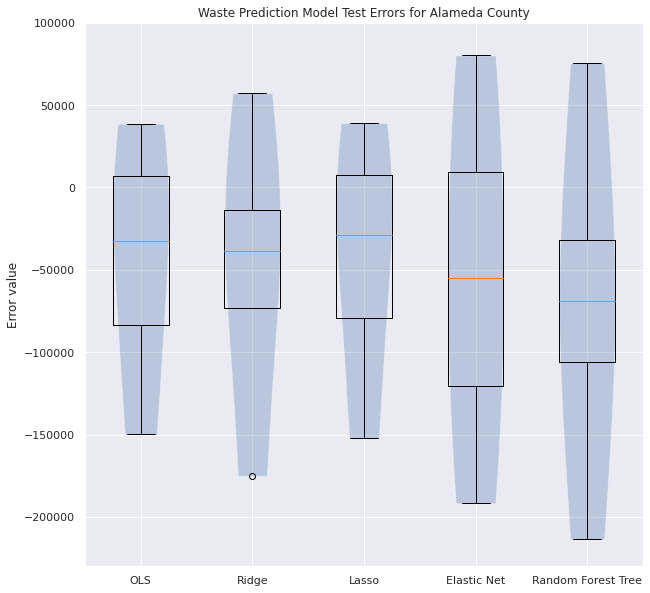

In [ ]:
data = [ols_res_alameda,ridge_res_alameda,lasso_res_alameda,en_res_alameda,rf_tree_res_alameda]

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title('Waste Prediction Model Test Errors for Alameda County')
ax.set_ylabel('Error value')
xticklabels=['OLS','Ridge', 'Lasso', 'Elastic Net','Random Forest Tree']
ax.set_xticklabels(xticklabels)
plt.ylim(-0.23*10**6,0.1*10**6)
ax.boxplot(data, autorange=False)
ax.violinplot(data, showextrema=False)
plt.show()

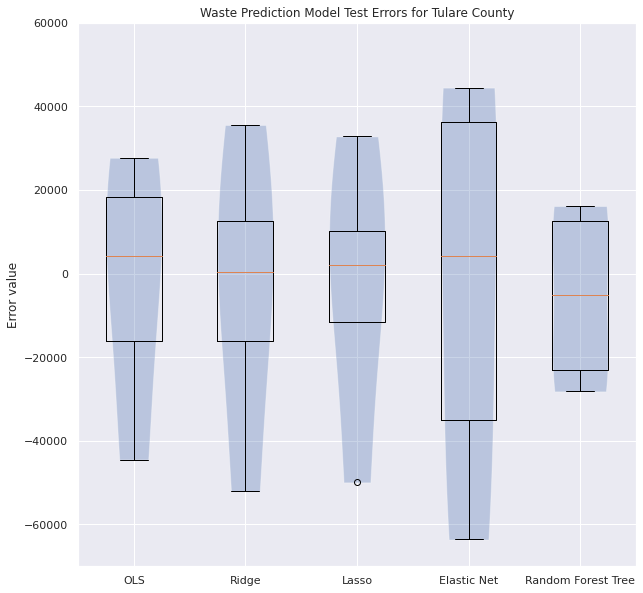

In [ ]:
data = [ols_res_tulare,ridge_res_tulare,lasso_res_tulare,en_res_tulare,rf_tree_res_tulare]

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title('Waste Prediction Model Test Errors for Tulare County')
ax.set_ylabel('Error value')
xticklabels=['OLS','Ridge', 'Lasso', 'Elastic Net','Random Forest Tree']
ax.set_xticklabels(xticklabels)
plt.ylim(-0.07*10**6,0.06*10**6)
ax.boxplot(data, autorange=False)
ax.violinplot(data, showextrema=False)
plt.show()

Based on the violin plot, each of the models used seem to have relatively similar distributions. For both Alameda and Tulare counties, Elastic Net has the widest distribution, implying it has the highest variance. For Alameda, Ridge has a significant outlier, while in Tulare county, Lasso has a significant outlier.

The following code plots the actual vs. predicted waste generation for the Alameda/Tulare data sets and the test data for each of the models.

Alameda County

In [ ]:
def plot_model_prediction_alameda(model, X, y, label):
  model.fit(X_train_alameda, y_train_alameda.values.ravel())
  y_pred = model.predict(X)
  plt.scatter(y_pred,y, label = label, alpha = 0.5)

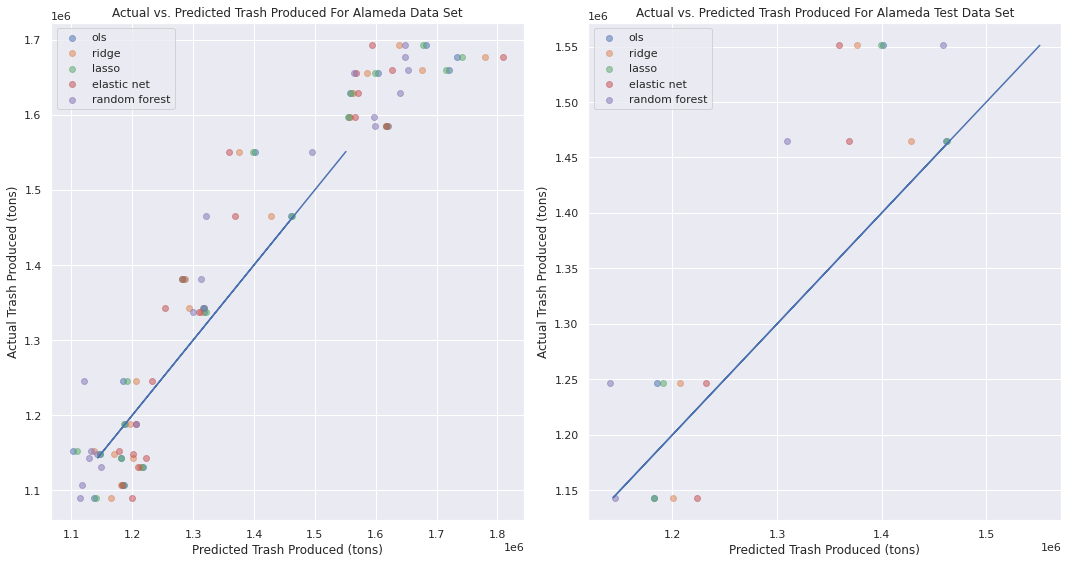

In [ ]:
models = {'ols': ols, 'ridge': ridge, 'lasso': lasso, 'elastic net': en, 'random forest': best_rf_model_alameda }

plt.figure(figsize=(15,8))
#plotting the actual vs. predicted values for each model predicting on the full data set
plt.subplot(121)
for model in models.keys():
  plot_model_prediction_alameda(models[model], alameda_feature_df, alameda_target, model)
plt.legend()
plt.plot(y_test_alameda, y_test_alameda)
plt.xlabel('Predicted Trash Produced (tons)')
plt.ylabel('Actual Trash Produced (tons)')
plt.title('Actual vs. Predicted Trash Produced For Alameda Data Set');

#plotting actual v. predicted models predicting on the test data set
plt.subplot(122)
for model in models.keys(): 
  plot_model_prediction_alameda(models[model], X_test_alameda, y_test_alameda,model)

plt.legend()
plt.plot(y_test_alameda, y_test_alameda)
plt.xlabel('Predicted Trash Produced (tons)')
plt.ylabel('Actual Trash Produced (tons)')
plt.title('Actual vs. Predicted Trash Produced For Alameda Test Data Set')
plt.tight_layout()
plt.show();

Tulare County

In [ ]:
def plot_model_prediction_tulare(model, X, y, label):
  model.fit(X_train_tulare, y_train_tulare.values.ravel())
  y_pred = model.predict(X)
  plt.scatter(y_pred,y, label = label, alpha = 0.5)

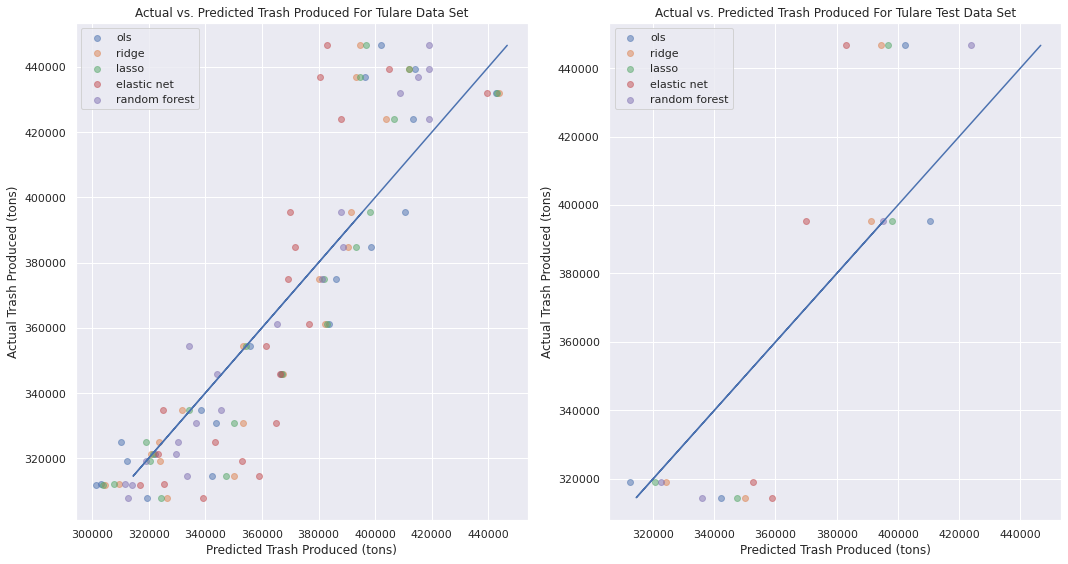

In [ ]:
models = {'ols': ols, 'ridge': ridge, 'lasso': lasso, 'elastic net': en, 'random forest': best_rf_model_tulare }

plt.figure(figsize=(15,8))
#plotting the actual vs. predicted values for each model predicting on the full data set
plt.subplot(121)
for model in models.keys():
  plot_model_prediction_tulare(models[model], tulare_feature_df, tulare_target, model)
plt.legend()
plt.plot(y_test_tulare, y_test_tulare)
plt.xlabel('Predicted Trash Produced (tons)')
plt.ylabel('Actual Trash Produced (tons)')
plt.title('Actual vs. Predicted Trash Produced For Tulare Data Set');

#plotting actual v. predicted models predicting on the test data set
plt.subplot(122)
for model in models.keys(): 
  plot_model_prediction_tulare(models[model], X_test_tulare, y_test_tulare,model)

plt.legend()
plt.plot(y_test_tulare, y_test_tulare)
plt.xlabel('Predicted Trash Produced (tons)')
plt.ylabel('Actual Trash Produced (tons)')
plt.title('Actual vs. Predicted Trash Produced For Tulare Test Data Set')
plt.tight_layout()
plt.show();

For both Alameda and Tulare counties, all of the models seem to perform relatively similarly. In general, the models seem to perform more consistently on a smaller set of data (i.e. one county) than on the entire dataset. That being said, it is difficult to draw any conclusions on these test dataset visualizations, because they are so small. Additionally, Alameda tends to be over-estimated at middle values, while Tulare tends to be under-estimated at middle values.

Elastic net clearly perform the worst - it doesn't seem to be as linear of a relationship and over-predicts pretty consistently.

## Using best model to predict waste generated by Alameda and Tulare

To show how the model performs, we plotted the predicted waste generation for Alameda and Tulare county each year against the observed values of waste generation. These predictions can be directly compared to the predictions/visualizations at the end of Part 1.

In [ ]:
best_model = lasso

In [ ]:
best_model.fit(alameda_feature_df, alameda_target.values.ravel())
alameda_county_df["Predicted Waste Produced"] = best_model.predict(alameda_feature_df)
alameda_county_df.reset_index(inplace=True)
alameda_county_df.rename(columns={"Waste Produced (Tons)": "Observed Waste Produced"}, inplace=True)
alameda_predictions_observations = alameda_county_df[["Year", "County", "Observed Waste Produced", "Predicted Waste Produced"]]

best_model.fit(tulare_feature_df, tulare_target.values.ravel())
tulare_county_df["Predicted Waste Produced"] = best_model.predict(tulare_feature_df)
tulare_county_df.reset_index(inplace=True)
tulare_county_df.rename(columns={"Waste Produced (Tons)": "Observed Waste Produced"}, inplace=True)
tulare_predictions_observations = tulare_county_df[["Year", "County", "Observed Waste Produced", "Predicted Waste Produced"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [ ]:
def generate_prediction_plot(df, county):
    """Generates plotly line chart for a given county depicting observed waste trends
    and predicted values
    """
    county_preds_obs = county_preds_obs = df[df.County == county]
    observations = county_preds_obs["Observed Waste Produced"]
    predictions = county_preds_obs["Predicted Waste Produced"]

    fig = go.FigureWidget(data=[
      go.Scatter(x=county_preds_obs.Year, y=observations, 
                  mode='lines', line={'dash': 'solid'}, name="Observed"),
      go.Scatter(x=county_preds_obs.Year, y=predictions, 
                  mode='lines', line={'dash': 'dash'}, name="Predicted")
    ])
    fig.update_xaxes(title_text='Year')
    fig.update_yaxes(title_text='Waste Produced (Tons)')
    fig.update_layout(title=county + " County Observed and Predicted Values")
    return fig

In [ ]:
fig = generate_prediction_plot(alameda_predictions_observations, "Alameda")
fig.show()

In [ ]:
fig = generate_prediction_plot(tulare_predictions_observations, "Tulare")
fig.show()

## Comparison of predictions based on the full dataset vs. subsets of the data 

The predictions made in Part 1 seemed to be less accurate than predictions made in Part 2. While the Alameda predictions are very similar for Parts 1 and 2, the predictions made for Tulare are much more accurate (closely following the observed trends) in Part 2. 

It seems that the predictions may be more accurate when based only on data from a given county, but the model may be overfit and less helpful when making predictions into the future.

# Error Analysis

**The pros and cons of modeling on small subsets of data**

* Smaller subsets of data seem to provide more consistency across modeling types. 
* Smaller subsets of data require less computational time for each individual function to run.
* Smaller subsets of data generally produce smaller MAEs. 
* Smaller subsets of data may make it more difficult to draw logical conclusions if the models have large variance and not enough data points to compensate.
* Smaller subsets of data may be more prone to overfitting.
* It takes longer to model each individual subset of data separately, than to train and test on one larger set of data with a single model.

# Part 3: Forecasting waste generation into the future

It's great to see how different kinds of models can predict waste generation over the course of a year, but these predictions don't tell us anything about the future. We now know that Random Forests is best for making predictions on a larger dataset, like our full dataset including all 57 California counties, and Lasso is best for making predictions on smaller datasets, like information about one individual California county. 

Let's use this foundational knowledge to predict waste generation in a given county for a future timepoint. In Part 3 of our project, we will forecast waste production for Alameda countt in the year 2020.

##Load the data

In [ ]:
complete_feature_df = pd.read_csv(DATA_PATH + "complete_feature_df.csv")
complete_feature_df.set_index("Year", inplace=True)
complete_feature_df.head()

,Waste Produced (Tons),County,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,,,
2000.0,1676429.25,Alameda,1443939.0,1953.856459,2926.106226,7631,203132,328399
2000.0,745.00,Alpine,1208.0,1.636125,6.247035,62,561,883
2000.0,41059.90,Amador,35100.0,59.033267,127.238094,1488,913,12563
2000.0,203896.87,Butte,203171.0,124.152744,705.766172,14199,17317,53845
2000.0,34110.44,Calaveras,40554.0,39.758434,173.578409,2235,856,19777


##"Lag" the data

In order to make predictions into the future, our features must "lag" 1 year compared to the target so the model can learn to predict a year into the future. The following function restructures an input dataframe so that the features properly lag to correspond with the correct year to make accurate predictions.

In [ ]:
def forecast_preprocessing(feature_df, county):
    """Aligns year n-1 features with year n.  e.g. 2019 waste produced should go with 2018 features
    """
    county_df = feature_df.loc[feature_df["County"] == county]
    
    target = county_df[["Waste Produced (Tons)"]]
    feature_df = county_df.drop(columns="Waste Produced (Tons)")
    
    # shift features down a year
    shifted_feature_df = feature_df.shift(-1)
    shifted_feature_df.dropna(how="all", inplace=True)
    shifted_feature_df.drop(columns=["County"], inplace=True)
    
    # "shift" target by dropping earliest year
    min_year = target.index.min()
    target = target.drop(min_year)
    
    assert len(target) == len(shifted_feature_df), "Length of features and target need to be equal"
    
    return shifted_feature_df, target

In [ ]:
alameda_features, alameda_target = forecast_preprocessing(complete_feature_df, "Alameda")

##Check the faithfulness of the altered data

In [ ]:
alameda_features.tail(2)

,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,
2017.0,1655306.0,2239.866309,2945.804917,7858.0,230442.0,363747.0
2018.0,1664783.0,2252.690049,3064.781376,7859.0,232321.0,365797.0


Check to ensure 2019 has been dropped from the features dataframe, and the features have been properly shifted, and the lag has been accounted for.

In [ ]:
alameda_target.tail(2)

,Waste Produced (Tons)
Year,
2018.0,1342490.34
2019.0,1465263.51


2019 *should* be included in the target variable dataframe, seeing as this is the value we are predicting.

In [ ]:
max_feature_year = alameda_features.index.max()
max_target_year = alameda_target.index.max()
print(max_feature_year, max_target_year)

2018.0 2019.0


##Train, Test Split of the data

In [ ]:
X_train_alameda, y_train_alameda = alameda_features.loc[alameda_features.index!=max_feature_year], alameda_target[alameda_target.index!=max_target_year]
X_test_alameda, y_test_alameda = alameda_features.loc[alameda_features.index==max_feature_year], alameda_target[alameda_target.index==max_target_year]

assert 2019 not in X_train_alameda.index.unique(), f"{max_target_year} should not be in the training data"
assert 2019 == y_test_alameda.index.unique(), f"{max_target_year} should be the test data"

These assert statements allowed us to be sure our data processing was carried out correctly.

# Model Selection on training data

We will now carry out the same evaluation of the best model to use as we did in Part 1 and Part 2. This evaluation will tell us which model is most effecive when forecasting waste generation. Models will be evaluating the lagged datasets for Alameda where we holdout the last year in the dataset as the test set so we pick the model that has the best forecast. Since the datasets are small, we will be using score_cv_model_2 which implements LOOCV rather than k-fold CV. 

Alameda Scores

In [ ]:
def score_cv_model_2(Model, X_train, y_train, X_test, y_test, alphas):
  """ The function fits a given model whose hyperparamteters have been tuned using LOOCV to the
      inputted X and y training data then outputs the cross-validated MAE score and the tuned model

      Model = model to fit the data on
      X_train = the training data feature matrix
      y_train = training data target variable (single column)
      X_test  = test data feature matrix
      y_test = test data target variable (single coulmn)
      alphas = an array of alpha values to perform the grid search on 
  """

  if Model == LinearRegression:
    modelcv = Model()
    modelcv.fit(X_train, y_train)
    #cv score on the training data 
    score = np.mean(cross_val_score(modelcv, X_train, y_train, scoring = 'neg_mean_absolute_error')*-1)

  else:
    model = Model()
    modelcv = GridSearchCV(estimator = model, param_grid = alphas, scoring = 'neg_mean_absolute_error')
    modelcv.fit(X_train, y_train) 
    print(modelcv.best_estimator_)
    #cv score of the tuned regression model 
    score = modelcv.best_score_*-1

  return score, modelcv

In [ ]:
#defines the range of alpha values to perform the grid search for each kind of regression model 
ridge_alphas = {'normalize': [True],'alpha': np.arange(0.001,1,.0005), 'tol': [0.00001]}
lasso_alphas = {'normalize': [True],'alpha': np.arange(1,50,1), 'max_iter': [100000]}
en_alphas = {'normalize': [True], 'alpha': np.arange(.1,5,.5), 'l1_ratio': np.arange(0.01,1,0.01),'max_iter': [100000]}

ols_score_alameda, ols = score_cv_model_2(LinearRegression, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda, 0)
ridge_score_alameda, ridge = score_cv_model_2(Ridge, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda, ridge_alphas) #correcting for the negative absolute error
lasso_score_alameda, lasso = score_cv_model_2(Lasso, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda, lasso_alphas) #correcting for the negative absolute error
en_score_alameda, en = score_cv_model_2(ElasticNet, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda, en_alphas) #correcting for the negative absolute error

print('cv ols score for Alameda county: ', ols_score_alameda)
print('cv ridge score for Alameda county: ', ridge_score_alameda)
print('cv lasso score for Alameda county: ', lasso_score_alameda)
print('cv elastic net score for Alameda county:', en_score_alameda)

Ridge(alpha=0.007, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=1e-05)
Lasso(alpha=49, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.99,
           max_iter=100000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
cv ols score for Alameda county:  197778.1885981392
cv ridge score for Alameda county:  118061.9353046099
cv lasso score for Alameda county:  171305.64901373998
cv elastic net score for Alameda county: 124213.24228840652


In [ ]:
random_forest_model = RandomForestRegressor()

possible_hyperparams = { 
    'n_estimators': [25, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,10)]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=possible_hyperparams, cv=5, scoring='neg_mean_absolute_error')

grid_search.fit(X_train_alameda, y_train_alameda.values.ravel()) # need to call this ravel function because of https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
best_score = -grid_search.best_score_ # needs to be negated because of https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error
best_rf_model_alameda = grid_search.best_estimator_
print(best_score, best_rf_model_alameda)

82166.80291333326 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


## Compare Final Models

- Compare best Linear Regression & Decision tree model for Alameda 


In [ ]:
def model_test_score(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train.values.ravel())
  y_pred = model.predict(X_test)

  residual = y_pred - y_test.to_numpy().flatten()
  mae = mean_absolute_error(y_test,y_pred)

  return mae, residual, y_pred

In [ ]:
ridge_test_alameda, ridge_res_alameda, ridge_y_alameda = model_test_score(ridge, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda)
rf_tree_test_alameda, rf_tree_res_alameda, rf_tree_y_alameda = model_test_score(best_rf_model_alameda, X_train_alameda, y_train_alameda, X_test_alameda, y_test_alameda)

print('ridge test score for Alameda county: ', ridge_test_alameda)
print('random forest tree test score for Alameda county: ', rf_tree_test_alameda)

ridge test score for Alameda county:  19397.847663404653
random forest tree test score for Alameda county:  146701.68599999952


In [ ]:
best_forecast_model = ridge

In [ ]:
def get_features_county_year(df, county, year):
    """Get features for a particular county and year without target variable
    """
    county_filter = df.County == county
    year_filter = df.index == year
    county_year = complete_feature_df.loc[county_filter & year_filter]
    county_year_features = county_year.drop(columns=["Waste Produced (Tons)", "County"])
    return county_year_features

In [ ]:
alameda_2019_features = get_features_county_year(complete_feature_df, "Alameda", 2019)
alameda_2019_features

,Population,Population Density (Person per Square Mile),Electricity Usage (GWh),Mobile Homes (units),Multi-Family (units),Single Family (units)
Year,,,,,,
2019.0,1664783.0,2252.690049,3064.781376,7859,232321,365797


In [ ]:
alameda_predicted = best_forecast_model.predict(alameda_2019_features)
alameda_predicted

array([1445865.6623366])

In [ ]:
def forecast_plot(county, observed, predicted):

    max_year = 2019 # alameda_target.index.max()
    observed.loc[max_year+1] = predicted
    
    observations = observed[observed.index <= max_year]
    predictions = observed[observed.index >= max_year]
    
    fig = go.FigureWidget(data=[
        go.Scatter(x=predictions.index, y=predictions["Waste Produced (Tons)"], 
               mode='lines+markers', line={'dash': 'solid', 'color': 'red'}, name="Predicted"),
        go.Scatter(x=observations.index, y=observations["Waste Produced (Tons)"], 
               mode='lines+markers', line={'dash': 'solid', 'color': 'blue'}, name="Observed")
    ])
    
    fig.update_xaxes(title_text='Year')
    fig.update_yaxes(title_text='Waste Produced (Tons)')
    fig.update_layout(title=county + " Forecasted Waste Production")
    
    return fig

In [ ]:
fig = forecast_plot("Alameda", alameda_target, alameda_predicted)
fig.show()

##Part 3 Summary

Interestingly enough, the best model trained on the entire dataset (Random forests) was not the same as the best model trained on Alameda's individual county data (Lasso), which was not the same as the best forecast model for Alameda (Ridge).

Shortcomings of the forecast model:

- It trained on a very limited dataset for a single county which only had 20 years worth of data.  Ideally we would have used all of the quarterly waste data that was available from 2000-2019.
- There was limited feature engineering with respect to capturing potential temporal patterns, we only attempted to capture the relationship between year n production and year n-1 features and could have used more advanced time series methods like an ARIMA model.

# 1.9 Interpretation and Conclusions

Using CalRecycle, California Energy Commission, and U.S. Census data, we were able to predict the amount of waste produced by a given county over the course of a year with relatively good accuracy. Tools like these models can and should be used more frequently by government entities to make informed decisions about local waste management. Policy makers can do more for their communities when they understand how their jurisdictions are evolving and their needs are changing.

While having an in-depth understanding of the makeup of the waste stream would be incredibly helpful for identifying increasing needs for composting and recycling, due to the timescale and depth limitations of this project, a comprehensive characterization of waste could not be predicted. This would be an excellent area to expand upon for future research.

Understanding annual generation trends, and being able to forecast production value, can allow for funding to be better allocated for construction and investment of waste infrastructure in places that need it most. Jobs can be created, prioritized, and better advertised in regions where waste generation is greatest, and bin sizing/distribution can also be altered to meet these needs. Understanding these patterns in waste distribution can also help inform institutions on how best to prioritize or structure sustainability programs to educate residents, address waste reduction, and hold members of the community accountable for the waste they generate.

In 2012, recycling and reuse alone in the United States accounted for 681,000 jobs, $37.8 billion in wages, and $5.5 billion in tax revenues. This equates to approximately 1.17 jobs for every 1,000 tons of materials recycled (2020 Recycling Economic Information Report, EPA).  Waste management is expensive and can be lucrative when managed properly. This industry should be more carefully considered when being addressed by lawmakers. 

Economic & employment benefits of better management aside - waste generation also has significant impacts on the health and livelihood of people and communities. As mentioned in the Project Background, waste disposal is an Environmental Justice issue. Even in our immediate communities, we can see disproportionate negative impacts on poorer communities and communities of color as UC Berkeley sends all of its waste to places like Richmond, Oakland, and Sacramento. Identifying ways to reduce waste and improve our current waste disposal and waste management systems will directly benefit our most vulnerable communities. Policy makers should be viewing this issue from both economic and social angles to improve the health and prosperity of California’s communities and the rest of the United States.

Looking more specifically at the models used in this analysis, the effectiveness of different model types and the accuracy of predictions made differed when training on the entire dataset vs. training on an individual county. Alameda county was well predicted by both the individual county dataset and the full training set. We believe this may be due to the fact that most of California’s waste comes from urbanized areas, and thus the model may be better at predicting waste generation in urbanized counties. Similarly, Tulare’s waste production in tons was significantly smaller than that of Alameda, which may have prevented it from being accurately predicted by the model trained on the entire dataset. It should be noted that the individual county models are only being trained on 15 data points, which is extremely small. This highly affected the variability in test error. It is hard to say whether the model trained for a specific county actually performs better than the full data set or if there was just too little data. Additionally, there may be a risk of overfitting on individual county data. 

It is interesting to note that the best modeling method for the full dataset differs from the best method for individual counties, and beyond that, the best method differed between Alameda and Tulare. In general, the model seemed to predict worse at higher volumes of waste (tons) with a tendency to overpredict. In the context of allocating resources and providing adequate landfill space, over predicting trash production would be less consequential than under predicting. 

Although the random forest model consistently performed best for Part 1, each time the notebook was rerun and data was shuffled, the best performing linear regression model varied. This would imply that the linear models could be overfitting to the data and have a higher error variance than the random forest models. Therefore, we feel relatively confident in picking random forest for our overall best performing model in Part 1. However, due to one hot encoding, the possibility of multicollinearity, and using MAE to score non-differentiable loss functions, we are not as confident in our choice of the best linear model. For Part 2, Lasso seemed to perform best, and in Part 3, Ridge seemed to perform best. Ensemble methods tend to be better at making predictions for larger datasets, while linear regression models were more effective for smaller subsets of the data.  A more detailed analysis of these topics can be found in the “errors and limitations” sections. 

In the future, our models might be improved by having finer spatial and temporal resolutions (e.g. waste generation in a given city per month). Averaging over a year may not capture seasonal variation which could be useful information when planning waste collection pickups and anticipating waste facility capacity and operation time. Our ability to predict into the future was also limited by the amount of data available. Having more historical data and doing more advanced feature engineering that better captures temporal patterns would allow us to make predictions further into the future. 